# **Predicting the Severity of Accident Crashes in Virginia**


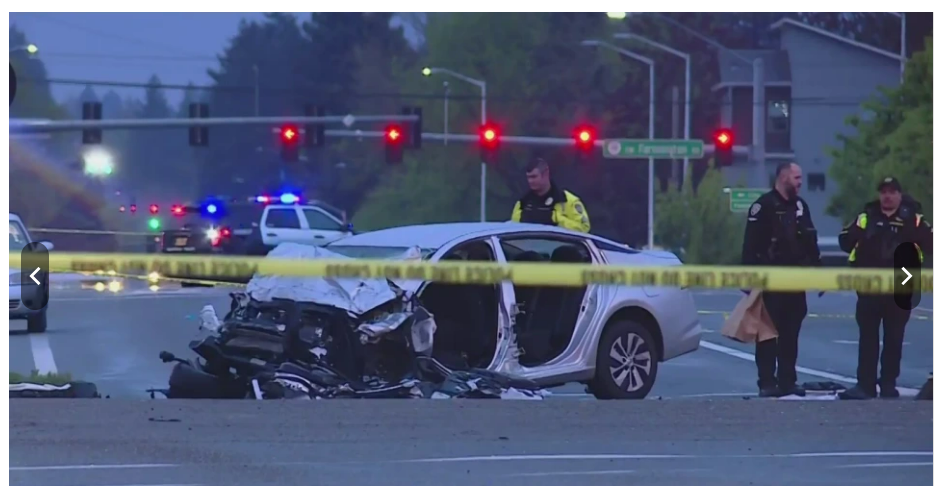

# Business Goal

Our goal is to find any columns that relate to the crash severity, and build predictive models based on said variables. 

## **STEPS**


1.   **Data Cleaning and Preprocessing**
1.   **EDA**
3.   **MODEL Building**







# Libraries

In [ ]:
## Data Manipulation
import pandas as pd
## Arithmetic
import numpy as np
## Visulaisations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
## used to show all columns and rowsif required
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Authenticate user and log into Pydrive.

#MUST BE USING A UMBC ACCOUNT
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
 

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#link to the data in google drive
link = 'https://drive.google.com/file/d/1zdt7le9SsLunIIPt7-nGg7X87biwtAFr/view'

#split to get the id part of the file
id = link.split("/")[-2]
 
#create the file in pydrive, then get the content from it
downloaded = drive.CreateFile({'id':id})


downloaded.GetContentFile('Full_Crash.csv') 

#import the file into a dataframe 
df = pd.read_csv('Full_Crash.csv')

Printing the shape of the datasets

In [ ]:
## Number of Rows and Columns
df.shape

(892211, 73)

In [ ]:
## Viewing top 5 records
df.head()

,X,Y,OBJECTID,DOCUMENT_NBR,CRASH_YEAR,CRASH_DT,CRASH_MILITARY_TM,CRASH_SEVERITY,K_PEOPLE,A_PEOPLE,B_PEOPLE,C_PEOPLE,PERSONS_INJURED,PEDESTRIANS_KILLED,PEDESTRIANS_INJURED,VEH_COUNT,COLLISION_TYPE,WEATHER_CONDITION,LIGHT_CONDITION,RD_TYPE,ROADWAY_SURFACE_COND,RELATION_TO_ROADWAY,ROADWAY_ALIGNMENT,ROADWAY_SURFACE_TYPE,ROADWAY_DEFECT,ROADWAY_DESCRIPTION,INTERSECTION_TYPE,TRAFFIC_CONTROL_TYPE,TRFC_CTRL_STATUS_TYPE,WORK_ZONE_RELATED,WORK_ZONE_LOCATION,WORK_ZONE_TYPE,FIRST_HARMFUL_EVENT,FIRST_HARMFUL_EVENT_LOC,ALCOHOL_NOTALCOHOL,BELTED_UNBELTED,BIKE_NONBIKE,DISTRACTED_NOTDISTRACTED,ANIMAL,DROWSY_NOTDROWSY,DRUG_NODRUG,GR_NOGR,HITRUN_NOT_HITRUN,LGTRUCK_NONLGTRUCK,MOTOR_NONMOTOR,PED_NONPED,SPEED_DIFF_MAX,SPEED_NOTSPEED,SCHOOL_ZONE,SENIOR_NOTSENIOR,YOUNG_NOTYOUNG,MAINLINE_YN,NIGHT,VDOT_DISTRICT,JURIS_CODE,PHYSICAL_JURIS,LOCAL_CASE_CD,FUN,FAC,AREA_TYPE,SYSTEM,VSP,OWNERSHIP,INTERSECTION_ANALYSIS,PLAN_DISTRICT,MPO_NAME,ROUTE_OR_STREET_NM,RTE_NM,RNS_MP,NODE,OFFSET,LAT,LON
0,-78.842781,38.430953,1,152435398,2015,2015/08/31 05:00:00+00,2106,O,0,0,0,0,0,0,0,2,2,1,4,0,1,9,1,2,1,2,4,3,1,2,0,0,20,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,3,0,1,1,1,8,115,115,2015-070514,E,1,1,4,2,3,2,6,HAR,E MARKET ST,R-VA US00033EB,24.41,587260.0,1309.0,38.430953,-78.842781
1,-77.220396,38.867337,2,150125241,2015,2015/01/12 05:00:00+00,1310,B,0,0,1,0,1,0,0,2,1,5,2,0,2,8,1,2,1,3,1,6,1,2,0,0,20,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,3,0,1,1,0,9,29,29,DIV715005286,A,3,1,1,7,1,0,8,NOVA,I-495 SOUTH,R-VA IS00495SB,7.69,NaN,NaN,38.867337,-77.220396
2,-77.763812,38.739854,3,153415062,2015,2015/12/04 05:00:00+00,1502,O,0,0,0,0,0,0,0,1,9,1,2,0,1,1,1,2,1,2,1,6,1,2,0,0,5,2,0,0,0,0,0,0,0,1,0,1,0,0,NaN,0,3,0,0,1,0,7,30,30,2015005875,E,1,1,2,2,1,1,9,NOVA,LEE HWY/ RT 29,R-VA US00029SB,209.05,313907.0,216.0,38.739854,-77.763812
3,-77.437491,38.825975,4,150790041,2015,2015/03/14 05:00:00+00,1942,C,0,0,0,1,1,0,0,2,1,1,4,0,2,8,3,2,1,2,1,3,3,2,0,0,20,1,0,0,0,1,0,0,0,0,0,0,0,0,NaN,0,3,0,0,1,1,9,29,29,20150730179,E,1,1,2,7,1,1,8,NOVA,RT 28 CENTREVILLE RD,R-VA SR00028NB,29.18,265267.0,63.0,38.825975,-77.437491
4,-78.776552,38.521835,5,152665011,2015,2015/09/18 05:00:00+00,2307,O,0,0,0,0,0,0,0,3,15,1,5,0,1,1,1,2,1,2,1,6,1,1,1,1,20,1,0,0,0,0,0,0,0,0,1,1,0,0,NaN,0,3,0,0,1,1,8,82,82,DIV215099945,1,3,0,1,2,1,0,6,NaN,INTERSTATE 81,R-VA IS00081SB,255.50,NaN,NaN,38.521835,-78.776552


In [ ]:
## Summary
df.describe()

,X,Y,OBJECTID,DOCUMENT_NBR,CRASH_YEAR,CRASH_MILITARY_TM,K_PEOPLE,A_PEOPLE,B_PEOPLE,C_PEOPLE,PERSONS_INJURED,PEDESTRIANS_KILLED,PEDESTRIANS_INJURED,VEH_COUNT,COLLISION_TYPE,WEATHER_CONDITION,LIGHT_CONDITION,RD_TYPE,ROADWAY_SURFACE_COND,RELATION_TO_ROADWAY,ROADWAY_ALIGNMENT,ROADWAY_SURFACE_TYPE,ROADWAY_DEFECT,ROADWAY_DESCRIPTION,INTERSECTION_TYPE,TRAFFIC_CONTROL_TYPE,TRFC_CTRL_STATUS_TYPE,WORK_ZONE_RELATED,WORK_ZONE_LOCATION,WORK_ZONE_TYPE,FIRST_HARMFUL_EVENT,FIRST_HARMFUL_EVENT_LOC,ALCOHOL_NOTALCOHOL,BELTED_UNBELTED,BIKE_NONBIKE,DISTRACTED_NOTDISTRACTED,ANIMAL,DROWSY_NOTDROWSY,DRUG_NODRUG,GR_NOGR,HITRUN_NOT_HITRUN,LGTRUCK_NONLGTRUCK,MOTOR_NONMOTOR,PED_NONPED,SPEED_DIFF_MAX,SPEED_NOTSPEED,SCHOOL_ZONE,SENIOR_NOTSENIOR,YOUNG_NOTYOUNG,MAINLINE_YN,NIGHT,VDOT_DISTRICT,JURIS_CODE,PHYSICAL_JURIS,AREA_TYPE,SYSTEM,VSP,OWNERSHIP,INTERSECTION_ANALYSIS,RNS_MP,NODE,OFFSET,LAT,LON
count,892200.000000,892200.000000,892211.000000,8.922110e+05,892211.000000,892211.000000,892211.000000,892211.00000,892211.000000,892211.000000,892211.000000,892211.000000,892211.000000,892211.000000,892211.000000,892211.000000,892211.00000,892211.000000,892211.000000,892211.000000,892211.000000,892211.000000,892211.000000,892211.000000,892211.000000,892211.000000,892211.000000,892211.000000,892211.000000,892211.000000,892211.000000,892211.00000,892211.000000,892211.000000,892211.000000,892211.000000,892211.000000,892211.000000,892211.000000,892211.000000,892211.000000,892211.000000,892211.000000,892211.000000,176876.000000,892211.000000,892211.000000,892211.00000,892211.000000,892211.000000,892211.000000,892211.000000,892211.000000,892211.000000,892211.000000,892211.000000,892211.000000,892211.000000,892211.000000,889854.000000,647642.000000,647642.000000,892200.000000,892200.000000
mean,-77.813549,37.755016,446106.000000,1.824486e+08,2018.043278,1348.533506,0.006774,0.06050,0.274178,0.173459,0.508138,0.000944,0.012201,1.841039,4.416656,1.716702,2.73620,0.492848,1.277051,7.132491,1.652824,1.972965,1.143242,1.970396,1.976416,4.783781,1.810165,1.973426,0.068727,0.070434,17.775719,1.48207,0.057742,0.040035,0.004992,0.191542,0.061446,0.028136,0.009344,0.051659,0.071961,0.079611,0.015653,0.012539,13.661486,0.198261,2.976150,0.16329,0.186852,0.898697,0.285193,5.555972,81.188422,81.188422,0.758286,2.935395,4.151327,1.690702,0.622030,53.028961,438516.431840,1212.156335,37.755016,-77.813549
std,1.405423,0.799644,257559.274848,2.059086e+07,2.066834,553.074692,0.087718,0.29347,0.630160,0.521265,0.887987,0.031105,0.115601,0.684444,4.048846,1.591711,1.21557,0.981527,0.794331,3.160633,1.439250,0.269370,0.914784,0.916046,1.292688,2.462154,1.832503,0.160836,0.436073,0.465043,6.834252,1.29696,0.233255,0.196042,0.070478,0.393515,0.240147,0.165361,0.096213,0.221338,0.258423,0.270691,0.124130,0.111271,10.734542,0.398690,0.208782,0.36963,0.389793,0.301730,0.451506,2.449424,55.025306,55.025306,0.428122,1.364825,2.231312,0.982714,0.812438,88.088268,199798.888131,3548.362937,0.799644,1.405423
min,-83.655409,36.540400,1.000000,1.435151e+08,2015.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-0.290000,50027.000000,0.000000,36.540400,-83.655409
25%,-78.337553,37.048243,223053.500000,1.629352e+08,2016.000000,932.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.00000,0.000000,1.000000,8.000000,1.000000,2.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000,0.000000,0.000000,20.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.0000

# 1)Data Cleaning and Pre processing

We have performed data pre processing and some columns were having only letters. so we went to official website 'Virginia Department of Transportation' and try to figure out what does each letter corresponds. Example can be seen in below cell.

In [ ]:
## 'CRASH_SEVERITY' column
## O = "PDO. Property Damage Only"    ### 66.45 
## B = "B. Visible Injury"            ### 19.62
## C = "C. Nonvisible Injury"         ### 8.35
## A = "A. Severe Injury"             ### 4.95
## K = "K. Fatal Injury"              ### 0.64

 Converting to 'CRASH_DT' to datetime type for Analysis  to get the overview of Accidents happened at what Date,year,month, Time

In [ ]:
df['CRASH_DT']=pd.to_datetime(df.CRASH_DT.astype(str))
df['CRASH_DT'].head()

0   2015-08-31 05:00:00+00:00
1   2015-01-12 05:00:00+00:00
2   2015-12-04 05:00:00+00:00
3   2015-03-14 05:00:00+00:00
4   2015-09-18 05:00:00+00:00
Name: CRASH_DT, dtype: datetime64[ns, UTC]

Adding new Column 'CRASH_SEVERITY_NEW'  : We are adding new column 'CRASH_SEVERITY_NEW' to the DataSet from the column 'CRASH_SEVERITY'. Here the values will be integers instead of Characters which will be helpful for our Analysis and Model Building

In [ ]:
df['CRASH_SEVERITY_NEW'] = df['CRASH_SEVERITY']
df['CRASH_SEVERITY_NEW'] = df['CRASH_SEVERITY_NEW'].replace(['O'],0)
df['CRASH_SEVERITY_NEW'] = df['CRASH_SEVERITY_NEW'].replace(['K'],1)
df['CRASH_SEVERITY_NEW'] = df['CRASH_SEVERITY_NEW'].replace(['A'],2)
df['CRASH_SEVERITY_NEW'] = df['CRASH_SEVERITY_NEW'].replace(['C'],3)
df['CRASH_SEVERITY_NEW'] = df['CRASH_SEVERITY_NEW'].replace(['B'],4)
df['CRASH_SEVERITY_NEW'].value_counts()

0    592856
4    175027
3     74462
2     44190
1      5676
Name: CRASH_SEVERITY_NEW, dtype: int64

Checking Unique Values in Each Column 

In [ ]:
unique_values = df.columns
print("Features:\n")
for i in unique_values:
  print(i, ":               ",df[i].unique().size)

Features:

X :                783065
Y :                783060
OBJECTID :                892211
DOCUMENT_NBR :                892211
CRASH_YEAR :                8
CRASH_DT :                2647
CRASH_MILITARY_TM :                1440
CRASH_SEVERITY :                5
K_PEOPLE :                6
A_PEOPLE :                14
B_PEOPLE :                24
C_PEOPLE :                22
PERSONS_INJURED :                31
PEDESTRIANS_KILLED :                4
PEDESTRIANS_INJURED :                8
VEH_COUNT :                17
COLLISION_TYPE :                17
WEATHER_CONDITION :                11
LIGHT_CONDITION :                7
RD_TYPE :                4
ROADWAY_SURFACE_COND :                11
RELATION_TO_ROADWAY :                15
ROADWAY_ALIGNMENT :                10
ROADWAY_SURFACE_TYPE :                6
ROADWAY_DEFECT :                10
ROADWAY_DESCRIPTION :                5
INTERSECTION_TYPE :                6
TRAFFIC_CONTROL_TYPE :                18
TRFC_CTRL_STATUS_TYPE :     

 Checking Duplicate records

In [ ]:
## We have to check the duplicate values before going further with the dataset
print(f'There are {df.duplicated().sum()} duplicates in the {df.shape[0]} rows')

There are 0 duplicates in the 892211 rows


#### Handling Missing Values

Missing Values Percentages for each column greater than 0

In [ ]:
## Missing Values Percentages for each column
nullvalues = pd.DataFrame(df.isnull().sum()).reset_index()
nullvalues.columns = ['Feature', 'Missing_Percent(%)']
nullvalues['Missing_Percent(%)'] = nullvalues['Missing_Percent(%)'].apply(lambda x: x / df.shape[0] * 100)
nullvalues.loc[nullvalues['Missing_Percent(%)']>0,:]

,Feature,Missing_Percent(%)
0,X,0.001233
1,Y,0.001233
46,SPEED_DIFF_MAX,80.175541
56,LOCAL_CASE_CD,0.315620
57,FUN,13.758405
58,FAC,13.758405
65,MPO_NAME,21.533471
67,RTE_NM,0.000112
68,RNS_MP,0.264175
69,NODE,27.411565


 Missing Values Visualization

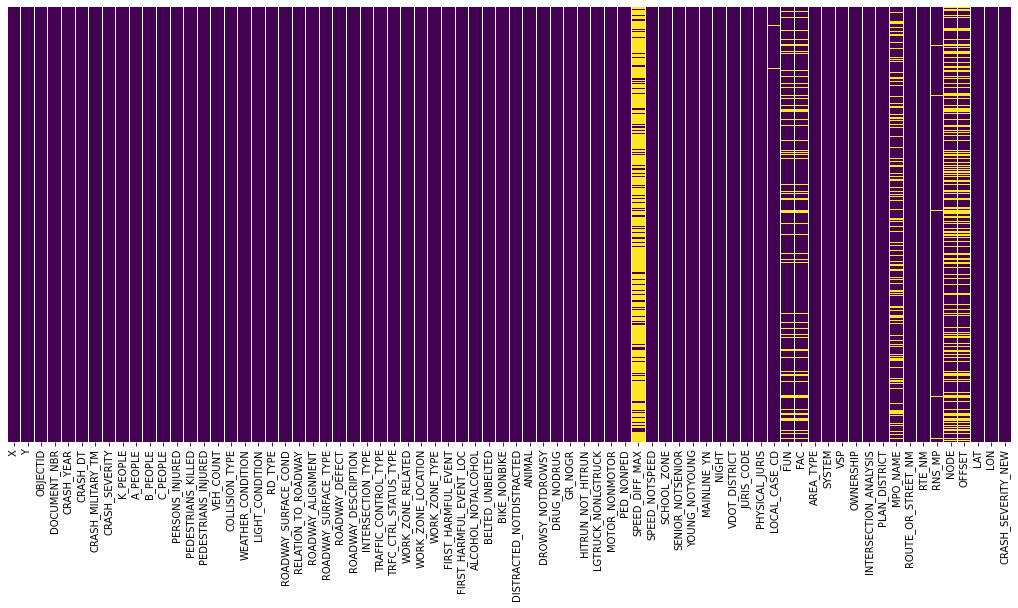

In [ ]:
## Missing Values Visualization
#Some columns are having missing values
#color with purple are having least numbr of null values and yellow color with more null values
plt.figure(figsize=(18,8))
sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap="viridis")
plt.show()

Imputation

In [ ]:
## Dropping Missing values column which are more 
df.drop(['X','Y','SPEED_DIFF_MAX','LOCAL_CASE_CD','FUN','FAC','MPO_NAME','RTE_NM','RNS_MP','NODE','OFFSET'],axis=1,inplace=True)

In [ ]:
## Handling Missing Values of columns
## Since it is having very less missing values and after exploring, We are replacing with mode with their respected columns
df['LAT'] = df['LAT'].fillna(df['LAT'].mode()[0])
df['LON'] = df['LON'].fillna(df['LON'].mode()[0])

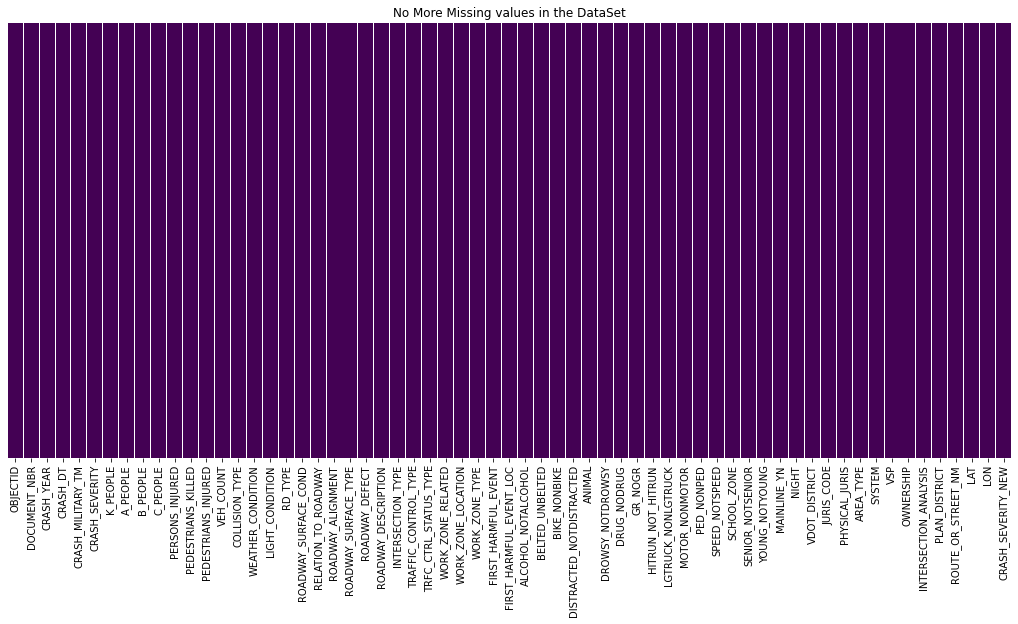

In [ ]:
## Missing Values Visualization
## color with purple are having least numbr of null values and yellow color with more null values
plt.figure(figsize=(18,8))
plt.title('No More Missing values in the DataSet')
sns.heatmap(df.isnull(), yticklabels=False,cbar=False,cmap="viridis")
plt.show()

## Removing Redundant Columns

After thorough research by considering various conditions and feature importance, we removed any redundant columns and selected the most important columns.

In [ ]:
df = df[['CRASH_YEAR', 'CRASH_DT','CRASH_SEVERITY','PERSONS_INJURED','PEDESTRIANS_KILLED','PEDESTRIANS_INJURED','COLLISION_TYPE','WEATHER_CONDITION', 'LIGHT_CONDITION','ROADWAY_DESCRIPTION','WORK_ZONE_RELATED','ALCOHOL_NOTALCOHOL','BELTED_UNBELTED', 'BIKE_NONBIKE', 'DISTRACTED_NOTDISTRACTED', 'ANIMAL','DROWSY_NOTDROWSY', 'DRUG_NODRUG', 'GR_NOGR', 'HITRUN_NOT_HITRUN','LGTRUCK_NONLGTRUCK', 'MOTOR_NONMOTOR',	
           'PED_NONPED', 'SPEED_NOTSPEED','SENIOR_NOTSENIOR', 'YOUNG_NOTYOUNG', 'MAINLINE_YN','NIGHT', 'VDOT_DISTRICT','AREA_TYPE', 'INTERSECTION_ANALYSIS', 'PLAN_DISTRICT', 'CRASH_SEVERITY_NEW']]

In [ ]:
df.head()

,CRASH_YEAR,CRASH_DT,CRASH_SEVERITY,PERSONS_INJURED,PEDESTRIANS_KILLED,PEDESTRIANS_INJURED,COLLISION_TYPE,WEATHER_CONDITION,LIGHT_CONDITION,ROADWAY_DESCRIPTION,WORK_ZONE_RELATED,ALCOHOL_NOTALCOHOL,BELTED_UNBELTED,BIKE_NONBIKE,DISTRACTED_NOTDISTRACTED,ANIMAL,DROWSY_NOTDROWSY,DRUG_NODRUG,GR_NOGR,HITRUN_NOT_HITRUN,LGTRUCK_NONLGTRUCK,MOTOR_NONMOTOR,PED_NONPED,SPEED_NOTSPEED,SENIOR_NOTSENIOR,YOUNG_NOTYOUNG,MAINLINE_YN,NIGHT,VDOT_DISTRICT,AREA_TYPE,INTERSECTION_ANALYSIS,PLAN_DISTRICT,CRASH_SEVERITY_NEW
0,2015,2015-08-31 05:00:00+00:00,O,0,0,0,2,1,4,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,8,1,2,6,0
1,2015,2015-01-12 05:00:00+00:00,B,1,0,0,1,5,2,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,9,1,0,8,4
2,2015,2015-12-04 05:00:00+00:00,O,0,0,0,9,1,2,2,2,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,7,1,1,9,0
3,2015,2015-03-14 05:00:00+00:00,C,1,0,0,1,1,4,2,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,9,1,1,8,3
4,2015,2015-09-18 05:00:00+00:00,O,0,0,0,15,1,5,2,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,8,0,0,6,0


In [ ]:
df.shape

(892211, 33)

# 2)EDA (Exploratory Data Analysis)

## Crash Severity -- Target Variable

Broken down into 5 categories with Property Damage Only being the main crash severity type. 

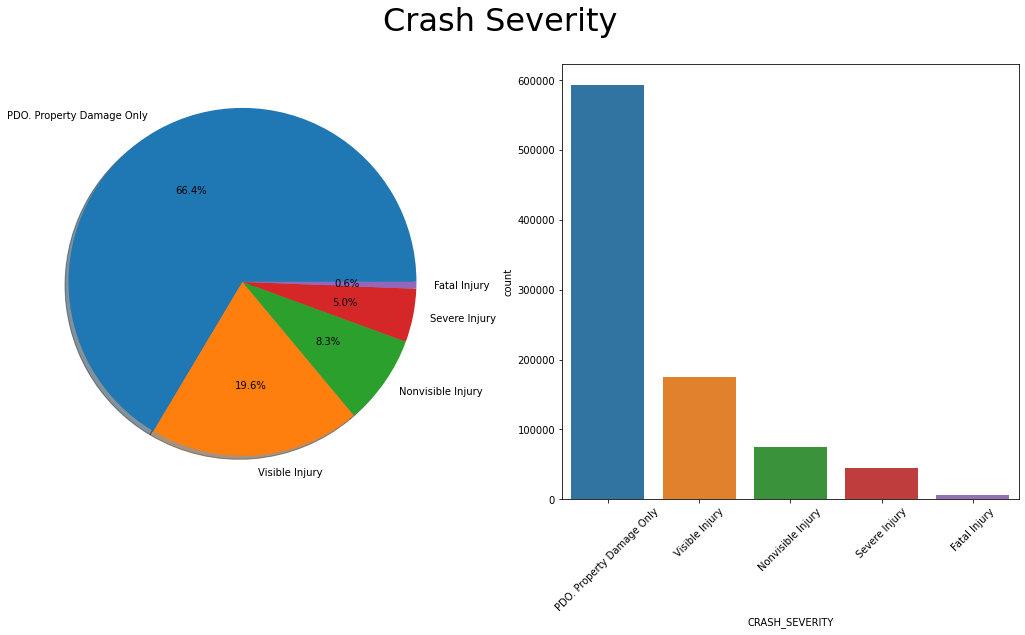

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))

labels = ['PDO. Property Damage Only','Visible Injury','Nonvisible Injury','Severe Injury','Fatal Injury']

df['CRASH_SEVERITY'].value_counts().plot.pie(explode=[0,0,0,0,0],autopct='%1.1f%%',ax=ax[0],shadow=True, labels=labels)
ax[0].set_title('')
ax[0].set_ylabel('')
f.suptitle('Crash Severity', fontsize=32)

sns.countplot('CRASH_SEVERITY',data=df,ax=ax[1],order=df['CRASH_SEVERITY'].value_counts().index)
ax[1].set_title('')
ax[1].set_xticklabels(labels, rotation=45)
plt.show()

#Time Analysis

##  Yearly Crashes

Looking at Crash Year, a lot of the crashes fell off in 2020 (most likely due to the pandemic)

2022 is an outlier since the year just started

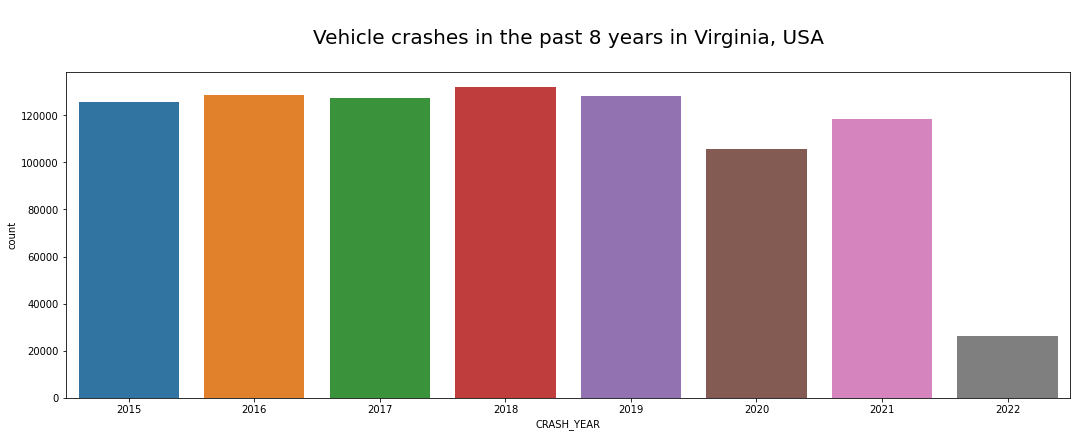

In [ ]:
#Looking at the crash year, changed the xticks to be in chronological order
plt.figure(figsize=(18,6))
ax = sns.countplot(data=df,x='CRASH_YEAR',order = df['CRASH_YEAR'].value_counts().index.values.sort())
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('\nVehicle crashes in the past 8 years in Virginia, USA\n', fontsize=20);
plt.show()

Adding Columns for the purpose of Time Analysis

In [ ]:

df['DAYOFWEEK'] = df['CRASH_DT'].dt.day_name()
df['DAY'] = df['CRASH_DT'].dt.day
df['HOUR'] = df['CRASH_DT'].dt.hour
df['DATE'] = df['CRASH_DT'].dt.date
df['TIME'] = df['CRASH_DT'].dt.time
df['MONTH'] = df['CRASH_DT'].dt.month_name()

## Day wise Crashes 

Looks like Most number of Accidents are oocuring on Friday, which is when the weekend time is starting, it might be because of drunk driving, rash driving etc..and also the severity is also more on Friday

Friday       149671
Thursday     134551
Tuesday      132222
Wednesday    131200
Monday       125408
Saturday     119418
Sunday        99741
Name: DAYOFWEEK, dtype: int64


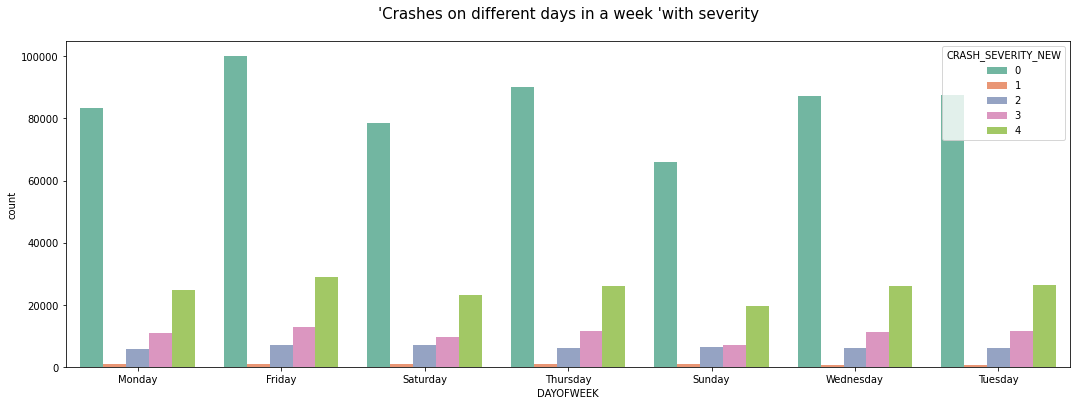

In [ ]:
print(df['DAYOFWEEK'].value_counts())
plt.figure(figsize=(18,6))
chart = sns.countplot(x='DAYOFWEEK', hue='CRASH_SEVERITY_NEW', data=df ,palette="Set2")
plt.title("'Crashes on different days in a week 'with severity", size=15, y=1.05)
plt.show()

##Monthly wise crashes

Looks like Most number of Accidents are oocuring in the month of October and April being the least

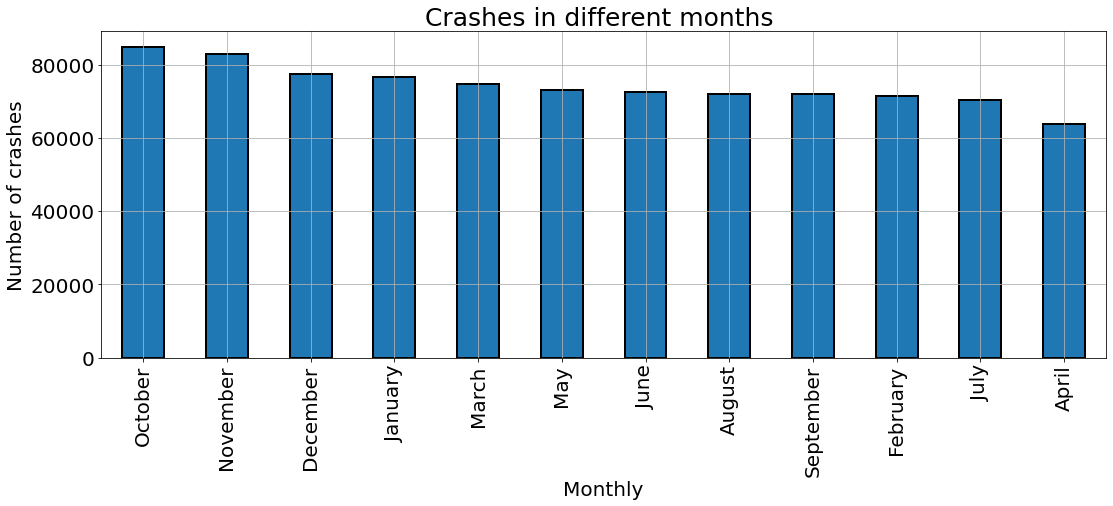

In [ ]:
##Crashes in the year  monthly wise
fig, ax=plt.subplots(figsize=(18,6))
df['MONTH'].value_counts(ascending=False).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Monthly',fontsize=20)
plt.ylabel('Number of crashes',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('Crashes in different months ',fontsize=25)
plt.grid()
plt.ioff()

# Persons Injured

Heavily leaning towards non-injured, but there's still a good amount who were injured

Extreme outliers present but still can be used


In [ ]:
#combine values where people were killed just for the pie chart
df['PERSONS_INJURED'].value_counts().values

combine = [df['PERSONS_INJURED'].value_counts().values[0],0]
for i in range(1,len(df['PERSONS_INJURED'].value_counts().values)):
  combine[1] += df['PERSONS_INJURED'].value_counts().values[i]

combine

[596231, 295980]

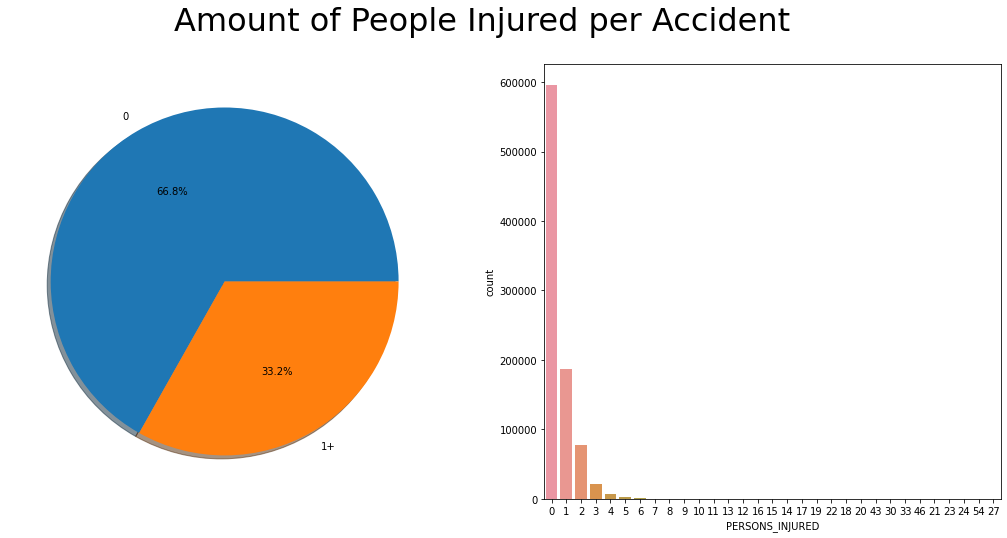

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))

labels = ['0','1+']

ax[0].pie(combine,autopct='%1.1f%%',shadow=True,labels=labels)
ax[0].set_title('')
ax[0].set_ylabel('')

f.suptitle('Amount of People Injured per Accident', fontsize=32)

sns.countplot('PERSONS_INJURED',data=df,ax=ax[1],order=df['PERSONS_INJURED'].value_counts().index)
ax[1].set_title('')
plt.show()

# Pedestrians Killed

**Now looking at the distribution this field is too heavily biased towards non-fatal accidents**

**Column likely doesn't have much effect on CRASH_SEVERITY**





In [ ]:
#combine 1+ killed just for the pie chart
df['PEDESTRIANS_KILLED'].value_counts().values

combine = [df['PEDESTRIANS_KILLED'].value_counts().values[0],0]
for i in range(1,len(df['PEDESTRIANS_KILLED'].value_counts().values)):
  combine[1] += df['PEDESTRIANS_KILLED'].value_counts().values[i]

combine

[891379, 832]

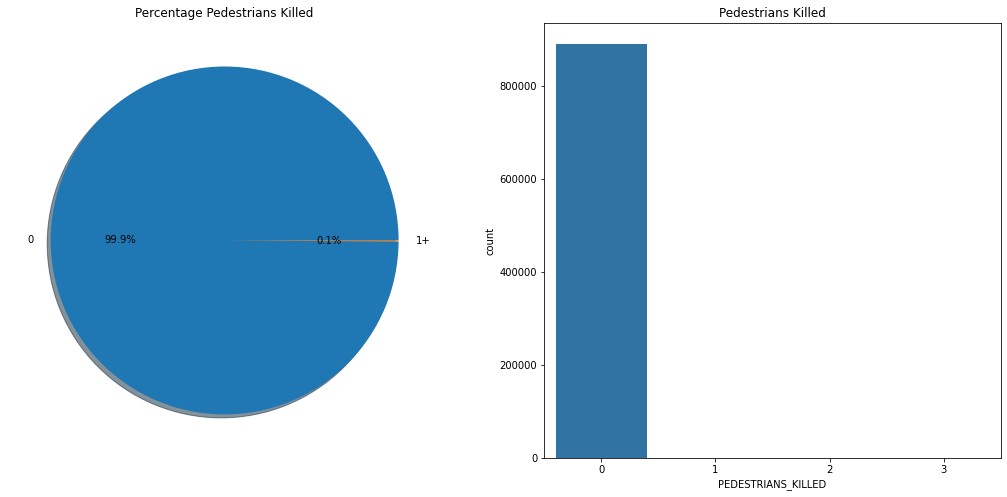

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))

labels = ['0','1+']

ax[0].pie(combine,autopct='%1.1f%%',shadow=True,labels=labels)
ax[0].set_title('Percentage Pedestrians Killed')
ax[0].set_ylabel('')
sns.countplot('PEDESTRIANS_KILLED',data=df,ax=ax[1],order=df['PEDESTRIANS_KILLED'].value_counts().index)
ax[1].set_title('Pedestrians Killed')
plt.show()

# Pedestrians Injured

**Now looking at the distribution this field is too heavily biased towards non-fatal accidents**

**Column likely doesn't have much effect on CRASH_SEVERITY**

In [ ]:
#combine 1+ accidents just for the pie chart
df['PEDESTRIANS_INJURED'].value_counts().values

combine = [df['PEDESTRIANS_INJURED'].value_counts().values[0],0]
for i in range(1,len(df['PEDESTRIANS_INJURED'].value_counts().values)):
  combine[1] += df['PEDESTRIANS_INJURED'].value_counts().values[i]

combine

[881823, 10388]

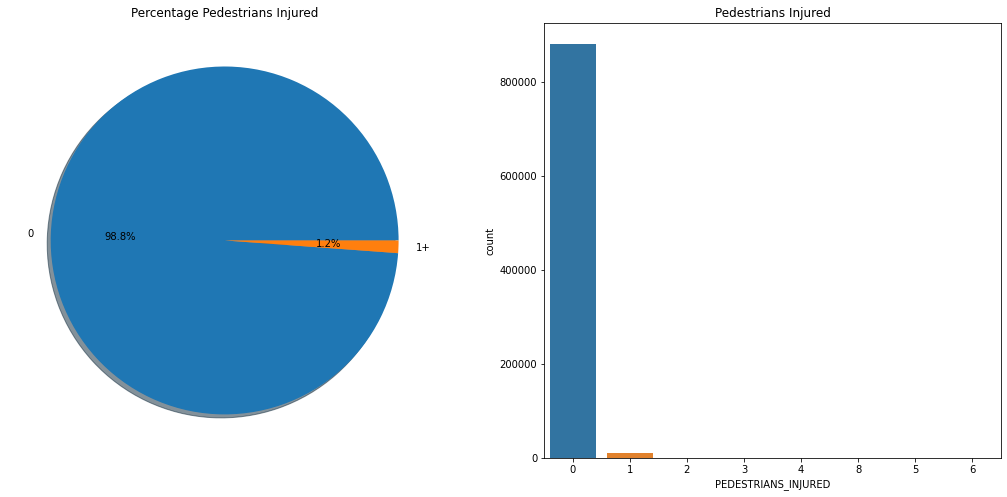

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))

labels = ['0','1+']

ax[0].pie(combine,autopct='%1.1f%%',shadow=True,labels=labels)
ax[0].set_title('Percentage Pedestrians Injured')
ax[0].set_ylabel('')
sns.countplot('PEDESTRIANS_INJURED',data=df,ax=ax[1],order=df['PEDESTRIANS_INJURED'].value_counts().index)
ax[1].set_title('Pedestrians Injured')
plt.show()

# Collision Type

Very spread distribution

**Column could have an impact on CRASH_SEVERITY**

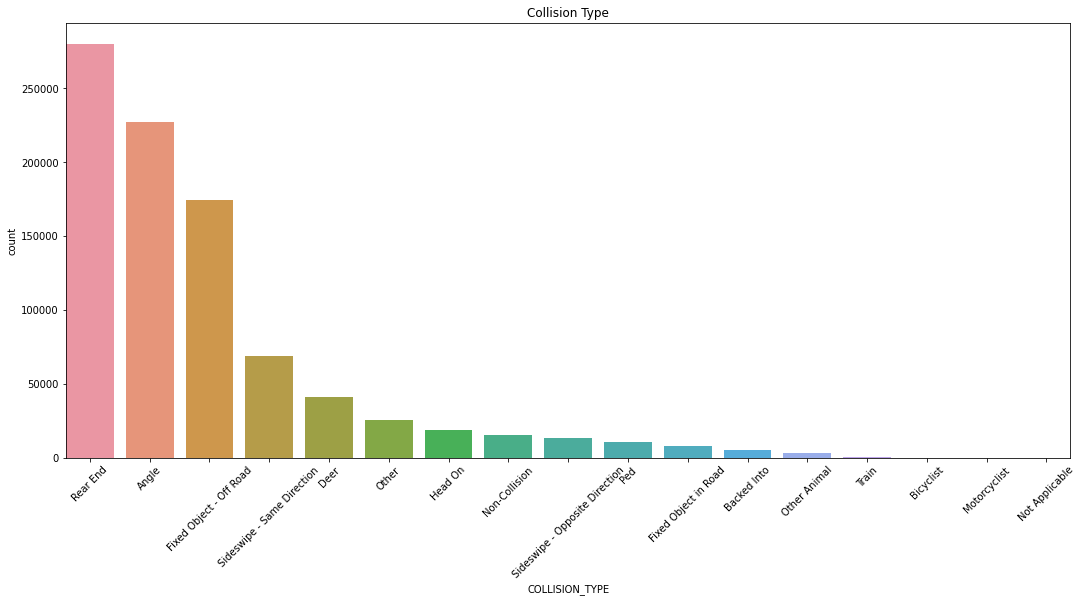

In [ ]:
f,ax=plt.subplots(figsize=(18,8))

#get labels for the collision type
labels = ['Rear End','Angle','Fixed Object - Off Road', 'Sideswipe - Same Direction', 'Deer', 'Other', 'Head On', 'Non-Collision', 'Sideswipe - Opposite Direction', 'Ped', 'Fixed Object in Road', 'Backed Into', 'Other Animal', 'Train', 'Bicyclist', 'Motorcyclist', 'Not Applicable']

sns.countplot('COLLISION_TYPE',data=df,order=df['COLLISION_TYPE'].value_counts().index)
ax.set_title('Collision Type')
plt.margins(x=0)
ax.set_xticklabels(labels,rotation=45)
plt.show()

# Weather Condtion

Clear weather condition is mostly dominant, but other weather types do appear

**Column likely doesn't have much effect on CRASH_SEVERITY**

In [ ]:
df['WEATHER_CONDITION'].value_counts().index

#Take the top 5 indexes for the pie chart 
take = []
for i in range(5):
  take.append(df['WEATHER_CONDITION'].value_counts().index[i])


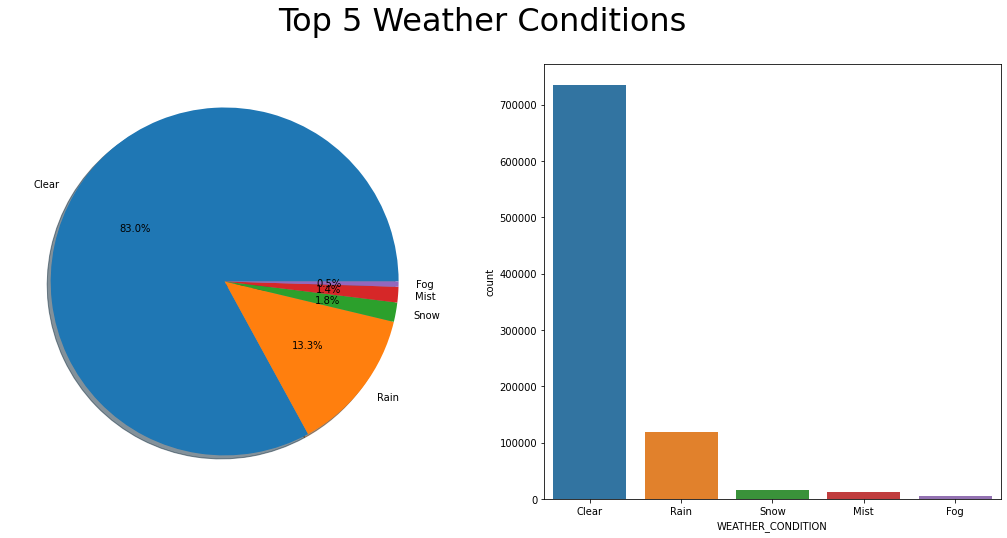

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))

#get labels for the top 5 weather conditions
group_labels = ['Clear','Rain','Snow', 'Mist', 'Fog']

ax[0].pie(df['WEATHER_CONDITION'].value_counts().values[:5],autopct='%1.1f%%',shadow=True,labels=group_labels)
ax[0].set_title('')
ax[0].set_ylabel('')

f.suptitle('Top 5 Weather Conditions', fontsize=32)

sns.countplot('WEATHER_CONDITION',data=df,ax=ax[1],order=df['WEATHER_CONDITION'].value_counts().index[:5])
ax[1].set_title('')
ax[1].set_xticklabels(group_labels, rotation=0)
plt.show()

# Light Condition

For the pie chart we combined the darkness values 

For the graph we used all the values

Good amount of darkness vs daylight, will be useful later on

**Column potentially has an effect on CRASH_SEVERITY**

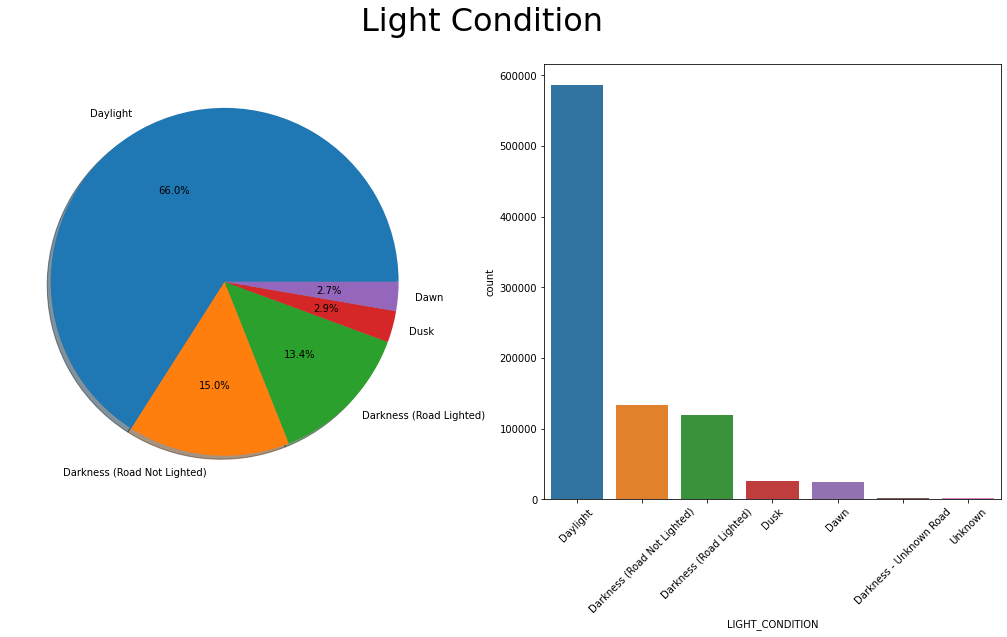

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))

#make seperate labels
labels = ['Daylight','Darkness (Road Not Lighted)','Darkness (Road Lighted)', 'Dusk', 'Dawn', 'Darkness - Unknown Road', 'Unknown']


#graph pie chart and count plot
ax[0].pie(df['LIGHT_CONDITION'].value_counts().values[:5],autopct='%1.1f%%',shadow=True,labels=labels[:5])
ax[0].set_title('')
ax[0].set_ylabel('')


f.suptitle('Light Condition', fontsize=32)


sns.countplot('LIGHT_CONDITION',data=df,ax=ax[1],order=df['LIGHT_CONDITION'].value_counts().index)
ax[1].set_title('')
ax[1].set_xticklabels(labels, rotation=45)
plt.show()

Text(0, 0.5, '')

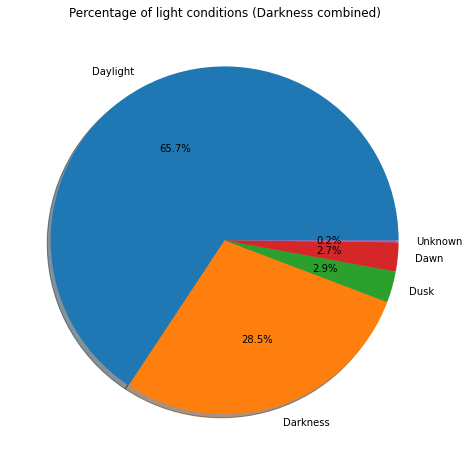

In [ ]:
plt.subplots(figsize=(18,8))

#make seperate labels
graph_labels = ['Daylight','Darkness (Road Not Lighted)','Darkness (Road Lighted)', 'Dusk', 'Dawn', 'Darkness - Unknown Road', 'Unknown']
pie_labels = ['Daylight', 'Darkness', 'Dusk', 'Dawn', 'Unknown']

#Combine darkness values just for the pie chart
pie_values = [df['LIGHT_CONDITION'].value_counts().values[0]]
pie_values.append(df['LIGHT_CONDITION'].value_counts().values[1]+df['LIGHT_CONDITION'].value_counts().values[2]+df['LIGHT_CONDITION'].value_counts().values[5])
pie_values.append(df['LIGHT_CONDITION'].value_counts().values[3])
pie_values.append(df['LIGHT_CONDITION'].value_counts().values[4])
pie_values.append(df['LIGHT_CONDITION'].value_counts().values[6])

#graph pie chart and count plot
plt.pie(pie_values,autopct='%1.1f%%',shadow=True,labels=pie_labels)
plt.title('Percentage of light conditions (Darkness combined)')
plt.ylabel('')

# Roadway Description

Great distribution

**Column likely doesn't have much effect on CRASH_SEVERITY**

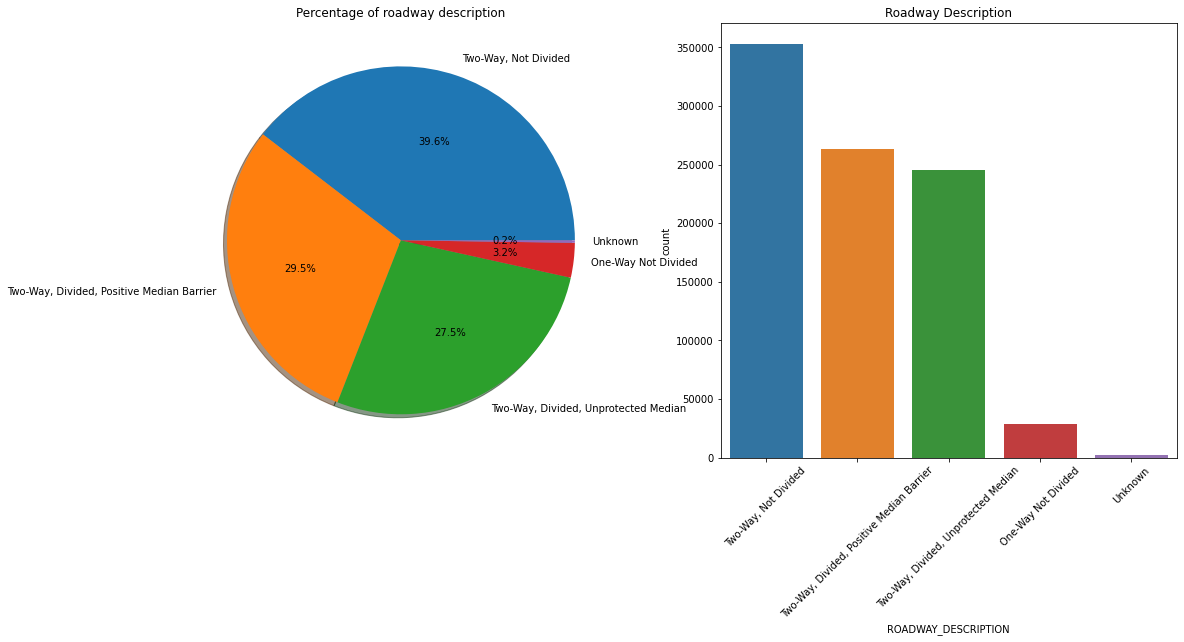

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))

#get labels for the roadway description
labels = ['Two-Way, Not Divided', 'Two-Way, Divided, Positive Median Barrier', 'Two-Way, Divided, Unprotected Median', 'One-Way Not Divided','Unknown']

ax[0].pie(df['ROADWAY_DESCRIPTION'].value_counts().values,autopct='%1.1f%%',shadow=True,labels=labels)
ax[0].set_title('Percentage of roadway description')
ax[0].set_ylabel('')

sns.countplot('ROADWAY_DESCRIPTION',data=df,order=df['ROADWAY_DESCRIPTION'].value_counts().index)
ax[1].set_title('Roadway Description')
ax[1].set_xticklabels(labels,rotation=45)
plt.show()

## Work Zone, Alochol?, Seat Belt?,  Bike?, Drowsy?, Drug?, 


*   Work Zone Related  : Heavily distributed towards No
*   Alochol?  : Heavily distributed towards No
*   Seat Belt?   :Heavily distributed towards No
*   Bike?: Heavily distributed towards No
*   Drowsy? : Heavily distributed towards No

*   Drug? : Heavily distributed towards No

All of these probably don't have much effect on the crash severity column

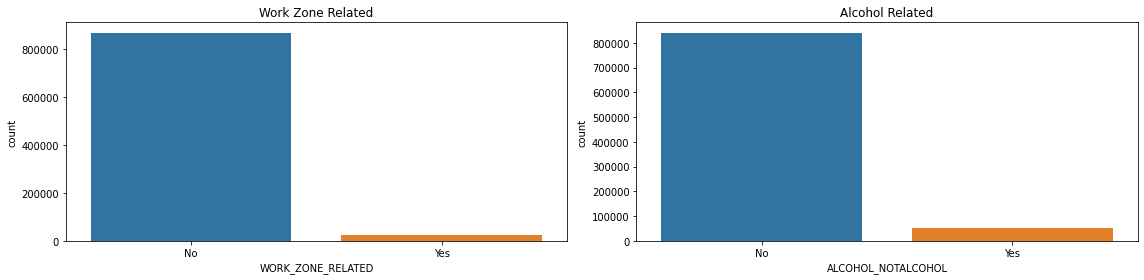

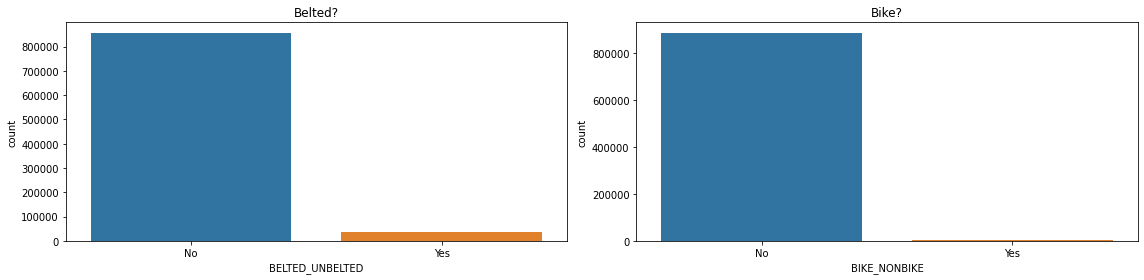

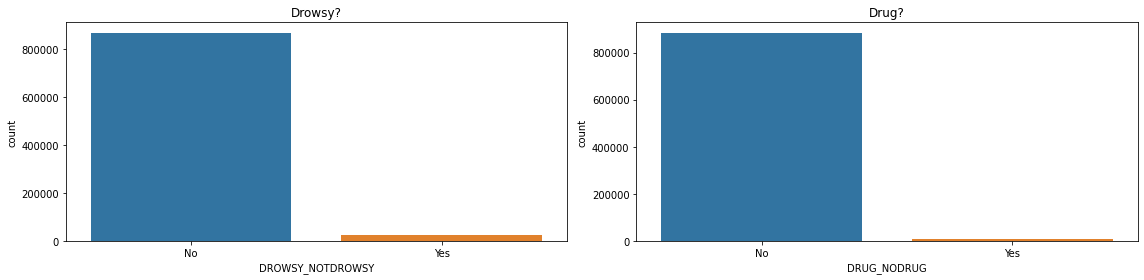

In [ ]:
f,ax=plt.subplots(1,2,tight_layout=True,figsize=(16,4))
# Work Zone Related
labels = ['No', 'Yes']
ax1 = sns.countplot('WORK_ZONE_RELATED',data=df,ax=ax[0],order=df['WORK_ZONE_RELATED'].value_counts().index)
ax1.set_title('Work Zone Related')
ax1.set_xticklabels(labels,rotation=0)
# Alochol?
labels = ['No', 'Yes']
ax2 = sns.countplot('ALCOHOL_NOTALCOHOL',data=df,ax=ax[1],order=df['ALCOHOL_NOTALCOHOL'].value_counts().index)
ax2.set_title('Alcohol Related')
ax2.set_xticklabels(labels,rotation=0)

# Seat Belt?
f,ax=plt.subplots(1,2,tight_layout=True,figsize=(16,4))
labels = ['No', 'Yes']
ax1 = sns.countplot('BELTED_UNBELTED',data=df,ax=ax[0],order=df['BELTED_UNBELTED'].value_counts().index)
ax1.set_title('Belted?')
ax1.set_xticklabels(labels,rotation=0)

# Bike?
labels = ['No', 'Yes']
ax2 = sns.countplot('BIKE_NONBIKE',data=df,ax=ax[1],order=df['BIKE_NONBIKE'].value_counts().index)
ax2.set_title('Bike?')
ax2.set_xticklabels(labels,rotation=0)

# Drowsy?
f,ax=plt.subplots(1,2,tight_layout=True,figsize=(16,4))
labels = ['No', 'Yes']
ax1 = sns.countplot('DROWSY_NOTDROWSY',data=df,ax=ax[0],order=df['DROWSY_NOTDROWSY'].value_counts().index)
ax1.set_title('Drowsy?')
ax1.set_xticklabels(labels,rotation=0)

# Drug?
labels = ['No', 'Yes']
ax2 = sns.countplot('DRUG_NODRUG',data=df,ax=ax[1],order=df['DRUG_NODRUG'].value_counts().index)
ax2.set_title('Drug?')
ax2.set_xticklabels(labels,rotation=0)

plt.show()

# Distracted?

Still heavily distributed towards No, but good amount are yes

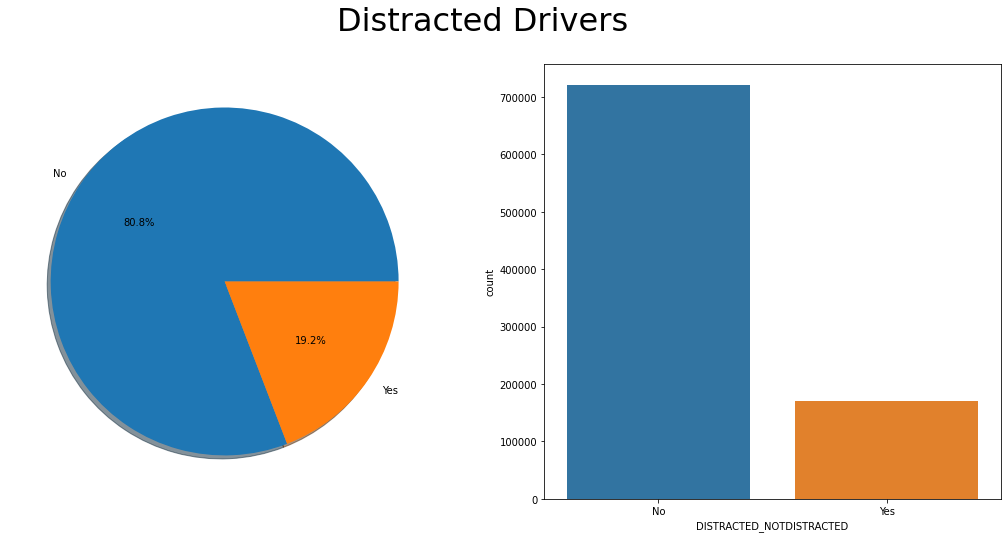

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))


labels = ['No', 'Yes']


ax[0].pie(df['DISTRACTED_NOTDISTRACTED'].value_counts().values,autopct='%1.1f%%',shadow=True,labels=labels)
ax[0].set_title('')
ax[0].set_ylabel('')

f.suptitle('Distracted Drivers', fontsize=32)

sns.countplot('DISTRACTED_NOTDISTRACTED',data=df,order=df['DISTRACTED_NOTDISTRACTED'].value_counts().index)
ax[1].set_title('')
ax[1].set_xticklabels(labels,rotation=0)
plt.show()

# Animal Related?

Heavily distributed towards No

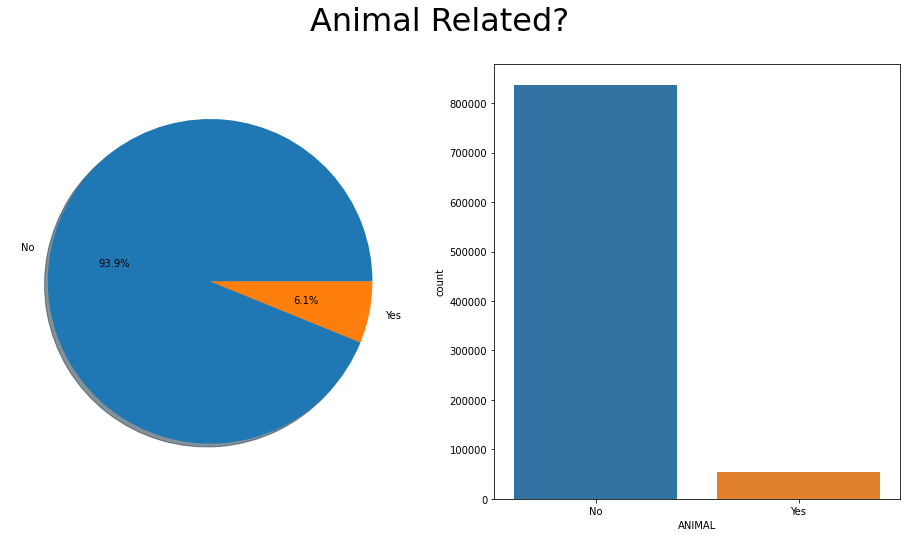

In [ ]:
f,ax=plt.subplots(1,2,figsize=(16,8))


labels = ['No', 'Yes']


ax[0].pie(df['ANIMAL'].value_counts().values,autopct='%1.1f%%',shadow=True,labels=labels)
ax[0].set_title('')
ax[0].set_ylabel('')

f.suptitle('Animal Related?', fontsize=32)

sns.countplot('ANIMAL',data=df,order=df['ANIMAL'].value_counts().index)
ax[1].set_title('')
ax[1].set_xticklabels(labels,rotation=0)
plt.show()

# Hit and Run?  Guardrail?



*   Hit and Run : Heavily distributed towards No
*   Guardrail    : Heavily distributed towards No



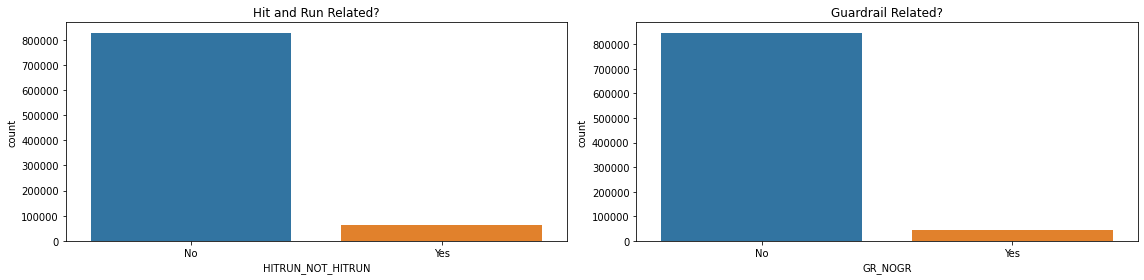

In [ ]:
f,ax=plt.subplots(1,2,tight_layout=True,figsize=(16,4))
## Hit and Run Related
labels = ['No', 'Yes']
ax1 = sns.countplot('HITRUN_NOT_HITRUN',data=df,ax = ax[0],order=df['HITRUN_NOT_HITRUN'].value_counts().index)
ax1.set_title('Hit and Run Related?')
ax1.set_xticklabels(labels,rotation=0)
## Guardrail Related
labels = ['No', 'Yes']
ax2 = sns.countplot('GR_NOGR',data=df,ax=ax[1],order=df['GR_NOGR'].value_counts().index)
ax2.set_title('Guardrail Related?')
ax2.set_xticklabels(labels,rotation=0)
plt.show()


# Large Vehicle?,Motorcycle?



*   Large Vehicle : Heavily distributed towards No
*   Motorcycle    : Heavily distributed towards No



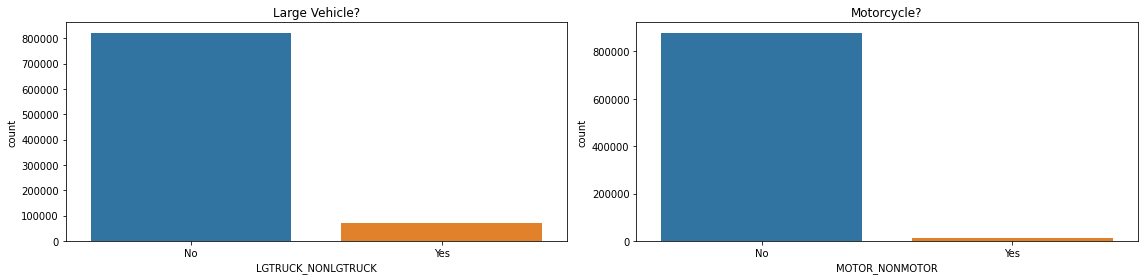

In [ ]:
f,ax=plt.subplots(1,2,tight_layout=True,figsize=(16,4))

## Large Vehicle
labels = ['No', 'Yes']
ax1 = sns.countplot('LGTRUCK_NONLGTRUCK',data=df,ax=ax[0],order=df['LGTRUCK_NONLGTRUCK'].value_counts().index)
ax1.set_title('Large Vehicle?')
ax1.set_xticklabels(labels,rotation=0)

## Motorcycle
labels = ['No', 'Yes']
ax2 = sns.countplot('MOTOR_NONMOTOR',data=df,ax=ax[1],order=df['MOTOR_NONMOTOR'].value_counts().index)
ax2.set_title('Motorcycle?')
ax2.set_xticklabels(labels,rotation=0)
plt.show()

# Pedestrian


Heavily distributed towards No

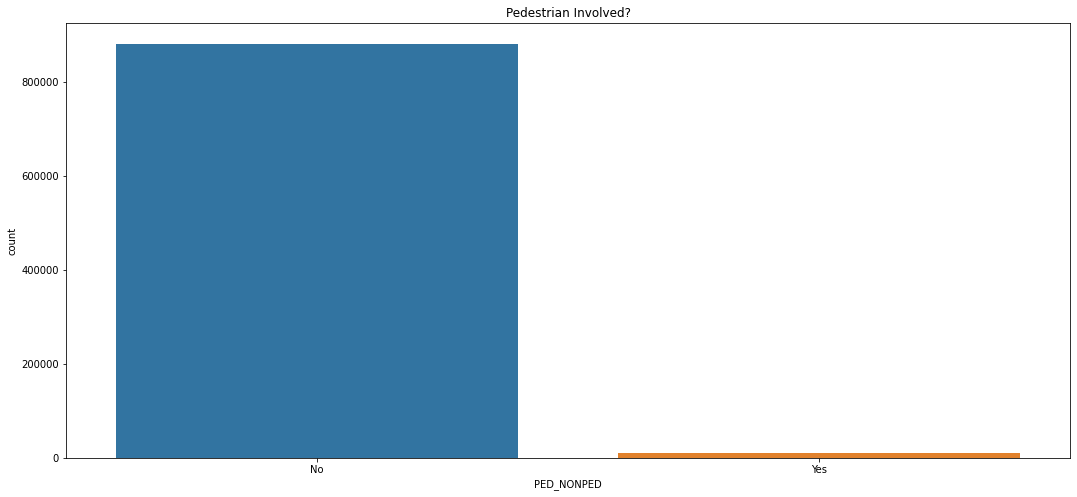

In [ ]:
f,ax=plt.subplots(figsize=(18,8))

labels = ['No', 'Yes']
sns.countplot('PED_NONPED',data=df,order=df['PED_NONPED'].value_counts().index)
ax.set_title('Pedestrian Involved?')
ax.set_xticklabels(labels,rotation=0)
plt.show()

# Speeding?

Heavily No still, but about 1/5th accidents were speeding

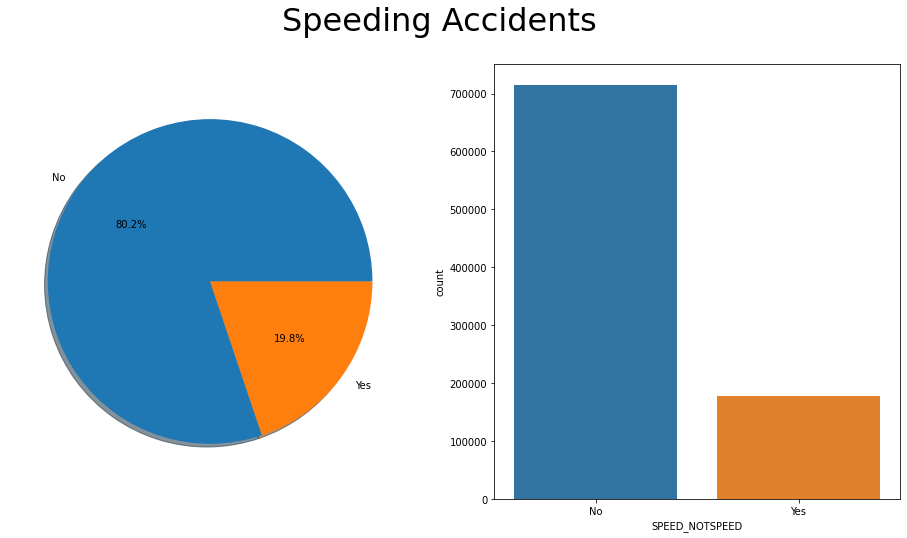

In [ ]:
f,ax=plt.subplots(1,2,figsize=(16,8))


labels = ['No', 'Yes']


ax[0].pie(df['SPEED_NOTSPEED'].value_counts().values,autopct='%1.1f%%',shadow=True,labels=labels)
ax[0].set_title('')
ax[0].set_ylabel('')

f.suptitle('Speeding Accidents', fontsize=32)

sns.countplot('SPEED_NOTSPEED',data=df,order=df['SPEED_NOTSPEED'].value_counts().index)
ax[1].set_title('')
ax[1].set_xticklabels(labels,rotation=0)
plt.show()

## Senior Driver? Young Driver? 


*   Heavily distributed towards No, but 16% were senior citizens


*  Heavily distributed towards No, but 18.7% were young drivers



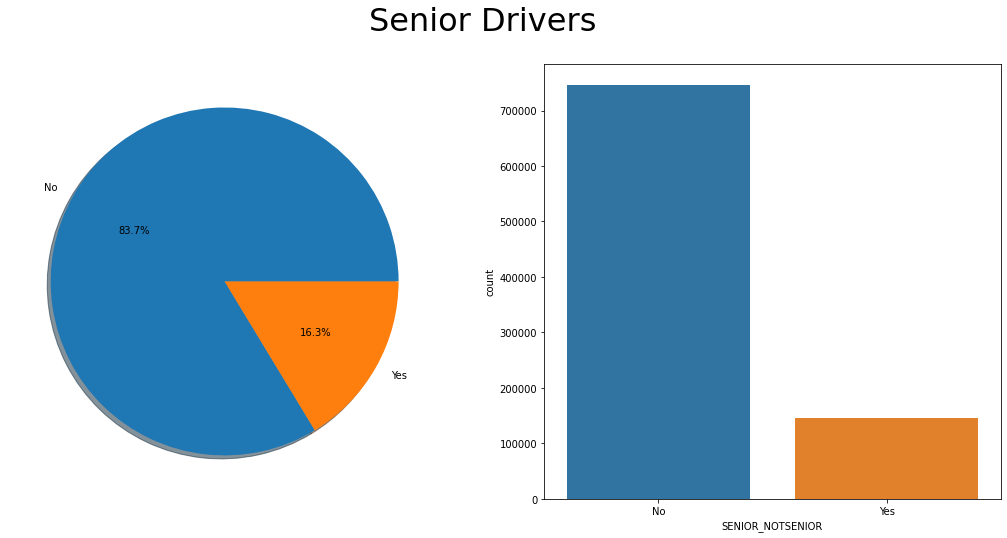

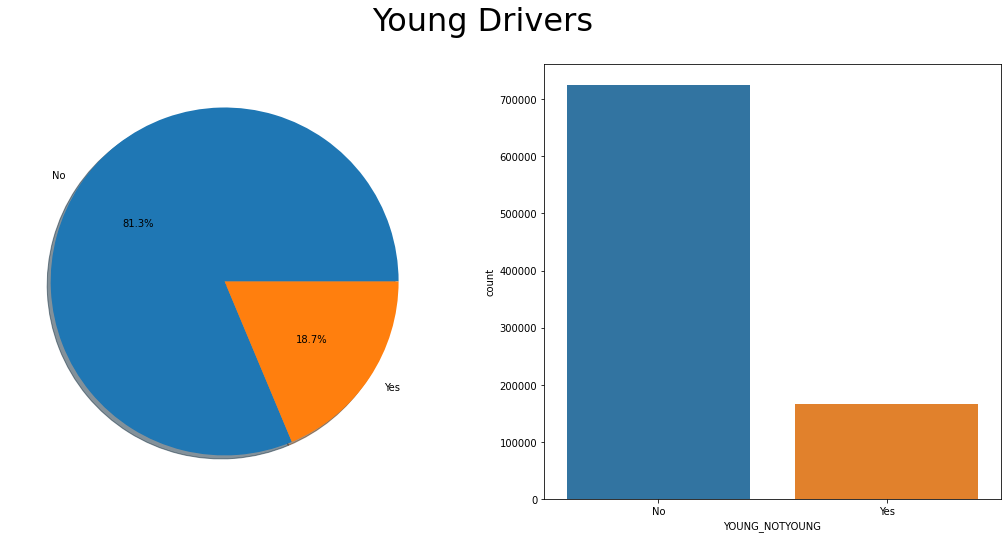

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
labels = ['No', 'Yes']


ax[0].pie(df['SENIOR_NOTSENIOR'].value_counts().values,autopct='%1.1f%%',shadow=True,labels=labels)
ax[0].set_title('')
ax[0].set_ylabel('')

f.suptitle('Senior Drivers', fontsize = 32)

sns.countplot('SENIOR_NOTSENIOR',data=df,order=df['SENIOR_NOTSENIOR'].value_counts().index)
ax[1].set_title('')
ax[1].set_xticklabels(labels,rotation=0)
plt.show()
#
f,ax=plt.subplots(1,2,figsize=(18,8))


labels = ['No', 'Yes']


ax[0].pie(df['YOUNG_NOTYOUNG'].value_counts().values,autopct='%1.1f%%',shadow=True,labels=labels)
ax[0].set_title('')
ax[0].set_ylabel('')

f.suptitle('Young Drivers', fontsize = 32)

sns.countplot('YOUNG_NOTYOUNG',data=df,order=df['YOUNG_NOTYOUNG'].value_counts().index)
ax[1].set_title('')
ax[1].set_xticklabels(labels,rotation=0)
plt.show()

# Mainline? (I believe this is railway accidents)



Heavily distributed towards No, but 10% were railway accidents

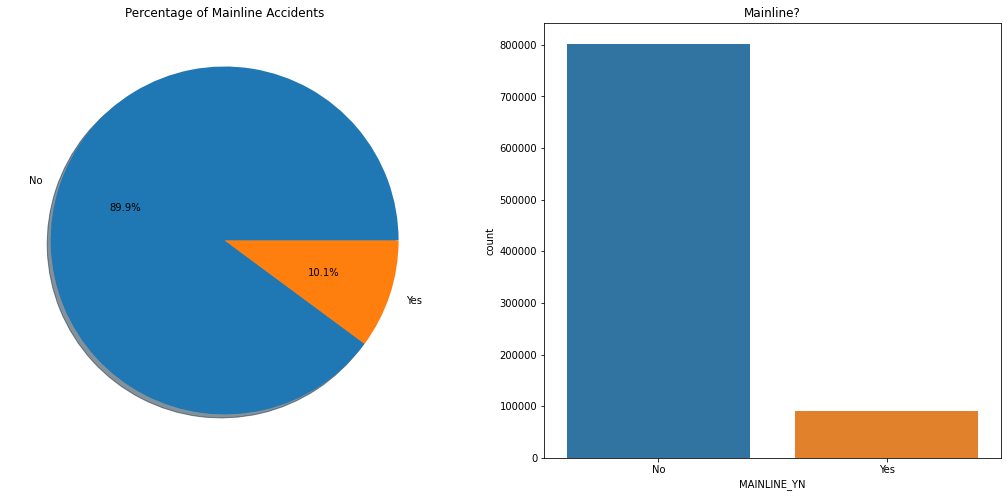

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))


labels = ['No', 'Yes']


ax[0].pie(df['MAINLINE_YN'].value_counts().values,autopct='%1.1f%%',shadow=True,labels=labels)
ax[0].set_title('Percentage of Mainline Accidents')
ax[0].set_ylabel('')

sns.countplot('MAINLINE_YN',data=df,order=df['MAINLINE_YN'].value_counts().index)
ax[1].set_title('Mainline?')
ax[1].set_xticklabels(labels,rotation=0)
plt.show()

# Night?

Around 30% of accidents took place around nighttime, could be useful

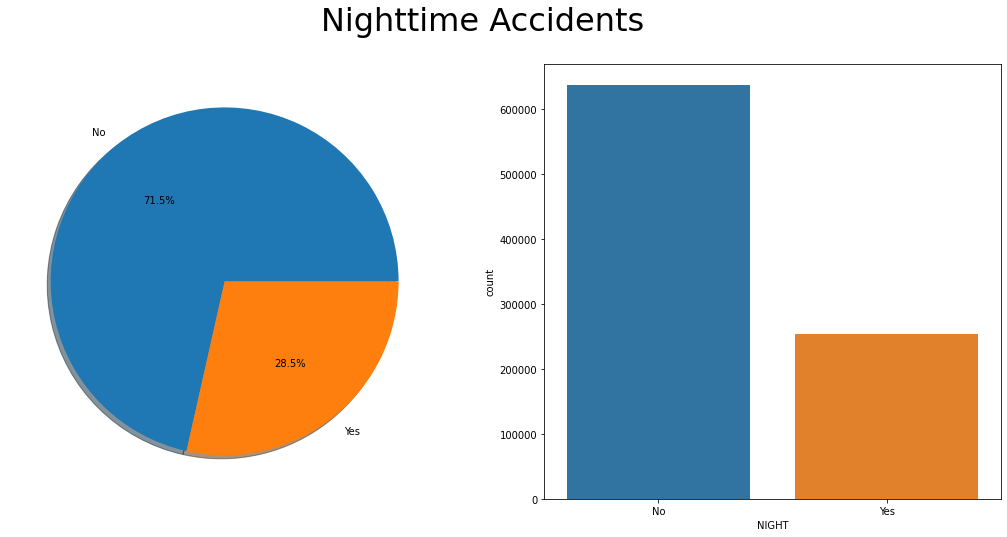

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))


labels = ['No', 'Yes']


ax[0].pie(df['NIGHT'].value_counts().values,autopct='%1.1f%%',shadow=True,labels=labels)
ax[0].set_title('')
ax[0].set_ylabel('')


f.suptitle('Nighttime Accidents', fontsize = 32)


sns.countplot('NIGHT',data=df,order=df['NIGHT'].value_counts().index)
ax[1].set_title('')
ax[1].set_xticklabels(labels,rotation=0)
plt.show()

# VDOT District (Virgnia districts)

Fair distribution, especially considering Richmond, Northern Virgnia, and Hampton Roads are the bigger areas.

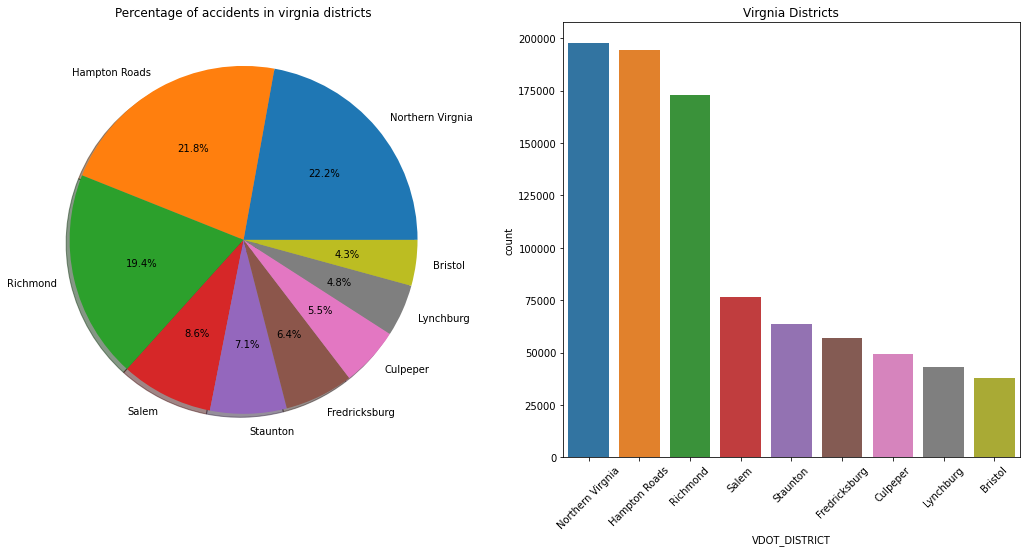

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))

#get labels for the roadway description
labels = ['Northern Virgnia','Hampton Roads','Richmond','Salem','Staunton','Fredricksburg','Culpeper','Lynchburg','Bristol']

ax[0].pie(df['VDOT_DISTRICT'].value_counts().values,autopct='%1.1f%%',shadow=True,labels=labels)
ax[0].set_title('Percentage of accidents in virgnia districts')
ax[0].set_ylabel('')

sns.countplot('VDOT_DISTRICT',data=df,order=df['VDOT_DISTRICT'].value_counts().index)
ax[1].set_title('Virgnia Districts')
ax[1].set_xticklabels(labels,rotation=45)
plt.show()

# Area Type

About 25% of accidents took place in rural/urban places

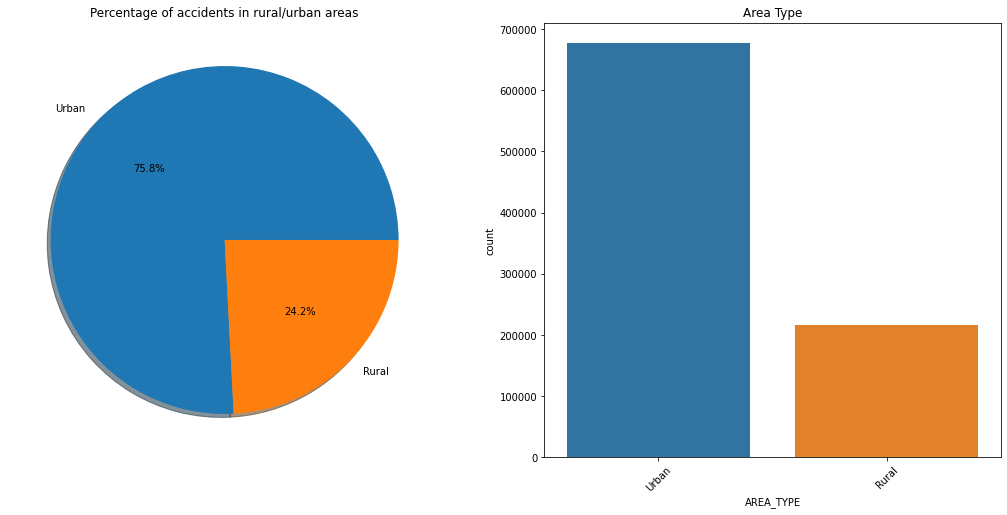

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))

#get labels for the roadway description
labels = ['Urban','Rural']

ax[0].pie(df['AREA_TYPE'].value_counts().values,autopct='%1.1f%%',shadow=True,labels=labels)
ax[0].set_title('Percentage of accidents in rural/urban areas')
ax[0].set_ylabel('')

sns.countplot('AREA_TYPE',data=df,order=df['AREA_TYPE'].value_counts().index)
ax[1].set_title('Area Type')
ax[1].set_xticklabels(labels,rotation=45)
plt.show()

# Intersection Analysis

Pretty split for non-intersection and intersection

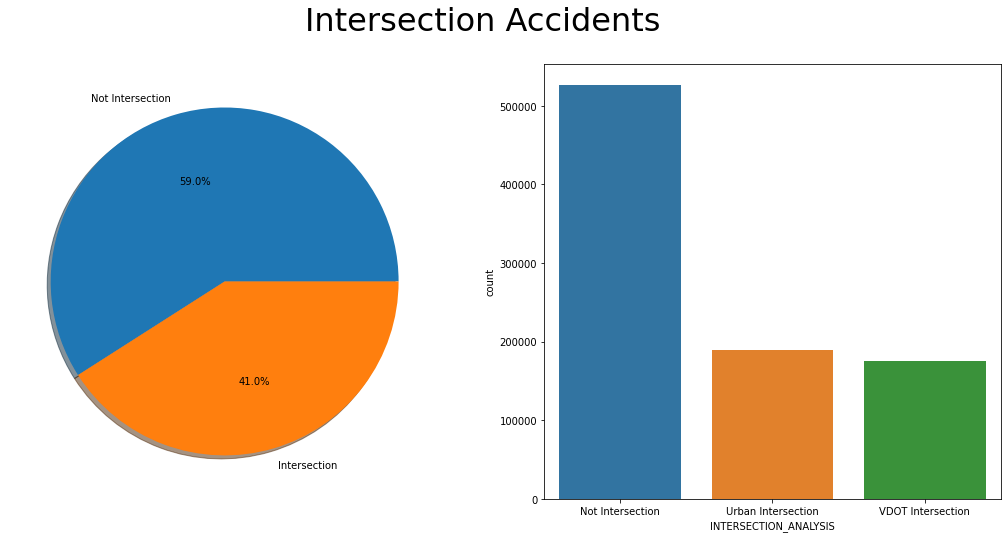

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))

#make seperate labels
graph_labels = ['Not Intersection','Urban Intersection', 'VDOT Intersection']
pie_labels = ['Not Intersection', 'Intersection']

#Combine intersection values just for the pie chart
pie_values = [df['INTERSECTION_ANALYSIS'].value_counts().values[0]]
pie_values.append(df['INTERSECTION_ANALYSIS'].value_counts().values[1]+df['INTERSECTION_ANALYSIS'].value_counts().values[2])


#graph pie chart and count plot
ax[0].pie(pie_values,autopct='%1.1f%%',shadow=True,labels=pie_labels)
ax[0].set_title('')
ax[0].set_ylabel('')

f.suptitle('Intersection Accidents', fontsize = 32)

sns.countplot('INTERSECTION_ANALYSIS',data=df,ax=ax[1],order=df['INTERSECTION_ANALYSIS'].value_counts().index)
ax[1].set_title('')
ax[1].set_xticklabels(graph_labels, rotation=0)
plt.show()

# One Hot Encoding
Luckily most of the data is already in integer format

In [ ]:
## recoding planning district
counter = 0
for i in df["PLAN_DISTRICT"].value_counts().index:
  df['PLAN_DISTRICT'] = df['PLAN_DISTRICT'].replace([i],counter)
  counter += 1

df['PLAN_DISTRICT'].value_counts()

0     197698
1     183644
2     105320
3      44941
4      39739
5      35216
6      32993
7      28412
8      26058
9      25519
10     24498
11     22929
12     22590
13     19826
14     19807
15     10173
16      9724
17      9679
18      8579
19      6436
20      5822
21      5618
22      3313
23      2945
24       732
Name: PLAN_DISTRICT, dtype: int64

In [ ]:
## recoding day of the weeks
counter = 0
for i in df["DAYOFWEEK"].value_counts().index:
  df['DAYOFWEEK'] = df['DAYOFWEEK'].replace([i],counter)
  counter += 1

df['DAYOFWEEK'].value_counts()

0    149671
1    134551
2    132222
3    131200
4    125408
5    119418
6     99741
Name: DAYOFWEEK, dtype: int64

In [ ]:
## recoding months
counter = 0
for i in df["MONTH"].value_counts().index:
  df['MONTH'] = df['MONTH'].replace([i],counter)
  counter += 1

df['MONTH'].value_counts()

0     84877
1     82996
2     77582
3     76754
4     74615
5     73134
6     72461
7     72110
8     71944
9     71483
10    70433
11    63822
Name: MONTH, dtype: int64

# Correlation Matrix for columns


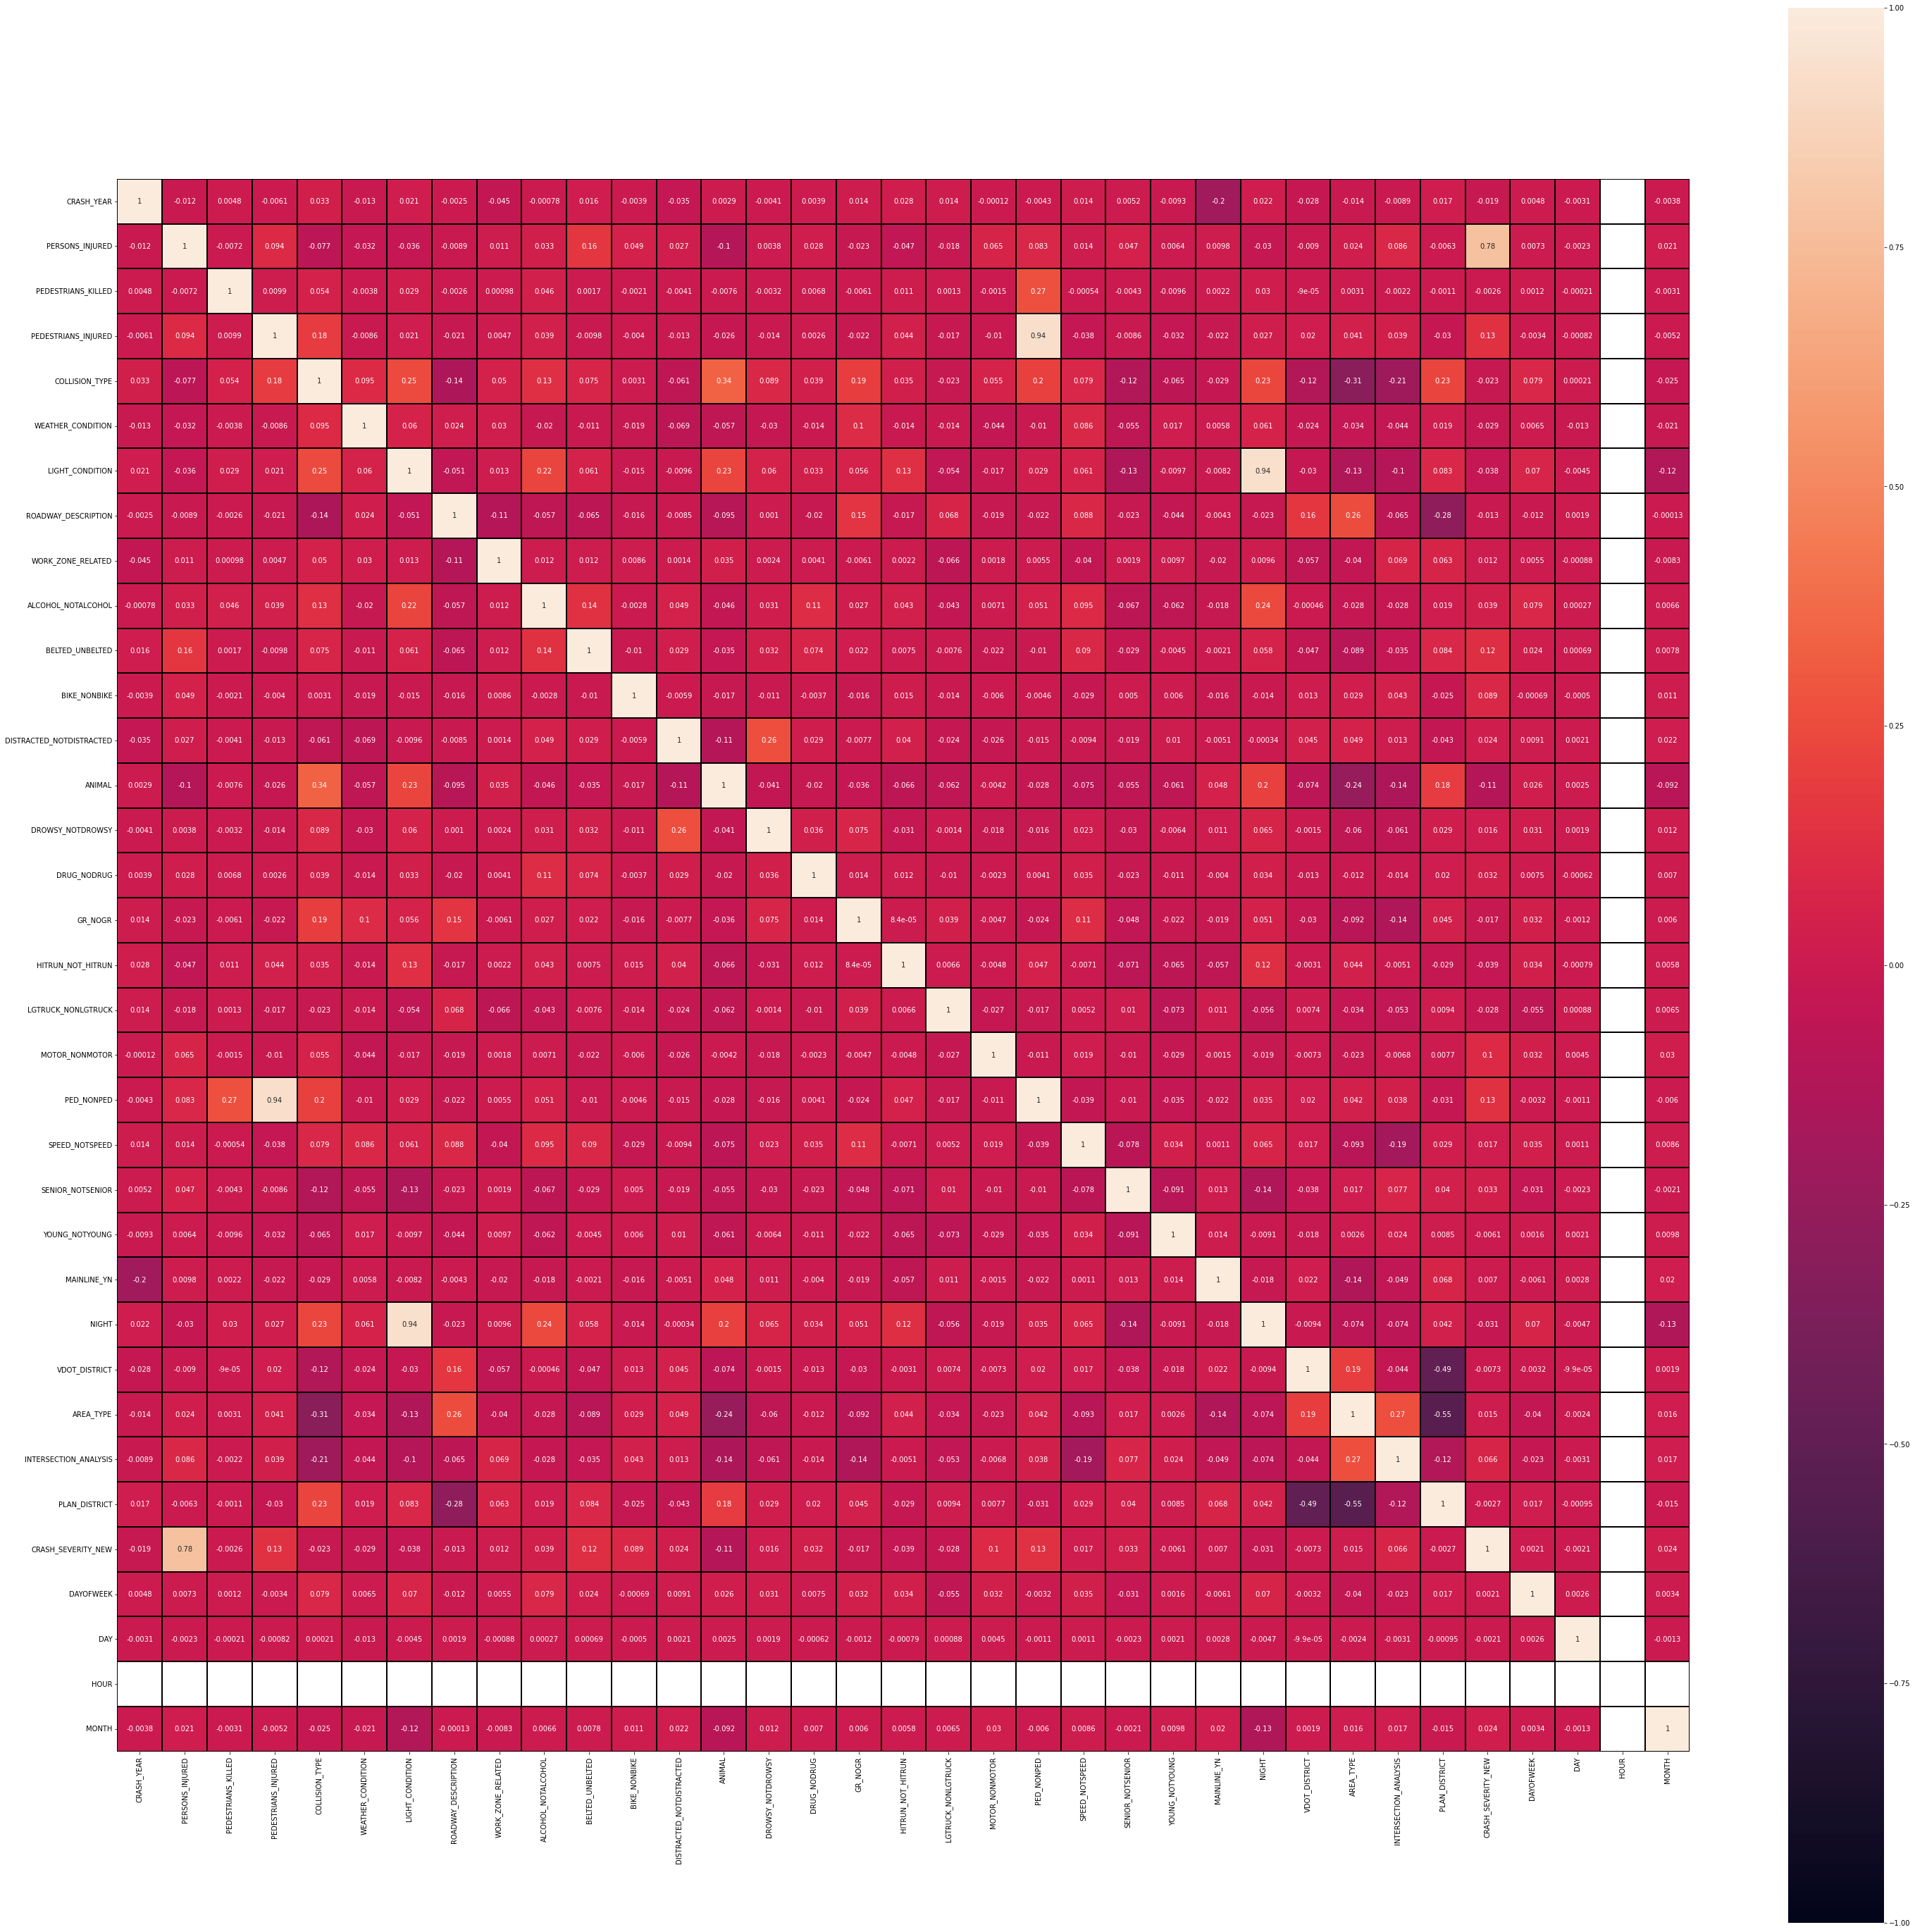

In [ ]:
fig=plt.gcf()
fig.set_size_inches(50,50)
fig=sns.heatmap(df.corr(),annot=True,linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

# Insight: **Persons_Injured has a strong correlation for the severity of accidents (more severe accidents are going to have more people injured than a less severe one)** 

In [ ]:
## deleted unused column
del df['CRASH_SEVERITY']

In [ ]:
#check dataframe to see if structure is right
df.head()

,CRASH_YEAR,CRASH_DT,PERSONS_INJURED,PEDESTRIANS_KILLED,PEDESTRIANS_INJURED,COLLISION_TYPE,WEATHER_CONDITION,LIGHT_CONDITION,ROADWAY_DESCRIPTION,WORK_ZONE_RELATED,ALCOHOL_NOTALCOHOL,BELTED_UNBELTED,BIKE_NONBIKE,DISTRACTED_NOTDISTRACTED,ANIMAL,DROWSY_NOTDROWSY,DRUG_NODRUG,GR_NOGR,HITRUN_NOT_HITRUN,LGTRUCK_NONLGTRUCK,MOTOR_NONMOTOR,PED_NONPED,SPEED_NOTSPEED,SENIOR_NOTSENIOR,YOUNG_NOTYOUNG,MAINLINE_YN,NIGHT,VDOT_DISTRICT,AREA_TYPE,INTERSECTION_ANALYSIS,PLAN_DISTRICT,CRASH_SEVERITY_NEW,DAYOFWEEK,DAY,HOUR,DATE,TIME,MONTH
0,2015,2015-08-31 05:00:00+00:00,0,0,0,2,1,4,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,8,1,2,5,0,4,31,5,2015-08-31,05:00:00,7
1,2015,2015-01-12 05:00:00+00:00,1,0,0,1,5,2,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,9,1,0,0,4,4,12,5,2015-01-12,05:00:00,3
2,2015,2015-12-04 05:00:00+00:00,0,0,0,9,1,2,2,2,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,7,1,1,11,0,0,4,5,2015-12-04,05:00:00,2
3,2015,2015-03-14 05:00:00+00:00,1,0,0,1,1,4,2,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,9,1,1,0,3,5,14,5,2015-03-14,05:00:00,4
4,2015,2015-09-18 05:00:00+00:00,0,0,0,15,1,5,2,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,8,0,0,5,0,0,18,5,2015-09-18,05:00:00,8


# 3)Model Building

Will be building Three Models : Logistic, Decision Tree, Random Forest

*   A)Modeling using all columns EXCLUDING PERSONS_INJURED (should get low accuracies)
*   B)Modeling using all columns INCLUDING PERSONS_INJURED (should get higher accuracies)
*   C) Hyperparameter Tuning to improve the Accuracy






## A)Modeling using all columns EXCLUDING PERSONS_INJURED (should get low accuracies)

In [ ]:
from sklearn.model_selection import train_test_split

#Test train split
x_clmns=list(df.columns)

#remove any uncessary columns along with PERSONS_INJURED
x_clmns.remove("PERSONS_INJURED")
x_clmns.remove("CRASH_SEVERITY_NEW")
x_clmns.remove("CRASH_DT")
x_clmns.remove("TIME")
x_clmns.remove("DATE")


#set the y columns to be the target variable
y_clmns=["CRASH_SEVERITY_NEW"]

#get the X and the y for the train test split
X=df[x_clmns].values
y=df[y_clmns].values

#reshape the target varaibles
y=np.reshape(y,(-1,1))
y=y[:,]

## Split the data set into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X,y[:,0], train_size=0.7, random_state=21)


print("Train size:",X_train.shape)
print("Test size:",X_test.shape)

severity_types={}
severity_types[1]=y_test[y_test==0].shape[0]
severity_types[2]=y_test[y_test==1].shape[0]
severity_types[3]=y_test[y_test==2].shape[0]
severity_types[4]=y_test[y_test==3].shape[0]
severity_types[5]=y_test[y_test==4].shape[0]

frame=pd.DataFrame(severity_types,index=["Different types of severity in test_data"])
display(frame)

Train size: (624547, 33)
Test size: (267664, 33)


,1,2,3,4,5
Different types of severity in test_data,177600,1729,13157,22569,52609


### Libraries required for model building

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Logistic Regression

In [ ]:
lr = LogisticRegression(random_state=0,solver='saga',max_iter=100)
lr.fit(X_train,y_train)

## Predicting training data
y_pred=lr.predict(X_train)
acc_train_lr=accuracy_score(y_train, y_pred)
print("Accuracy of train data:",acc_train_lr)

## Predicting test data
y_pred=lr.predict(X_test)
acc_test_lr=accuracy_score(y_test, y_pred)
print("Accuracy of test data:",acc_test_lr)

Accuracy of train data: 0.6649475539871299
Accuracy of test data: 0.6635968976029649


In [ ]:
## Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      1.00      0.80    177600
           1       0.00      0.00      0.00      1729
           2       1.00      0.00      0.00     13157
           3       0.00      0.00      0.00     22569
           4       0.45      0.00      0.00     52609

    accuracy                           0.66    267664
   macro avg       0.42      0.20      0.16    267664
weighted avg       0.58      0.66      0.53    267664



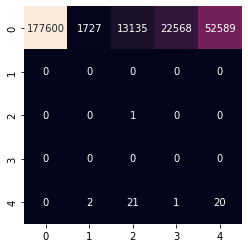

In [ ]:
mat_lr = confusion_matrix(y_pred,y_test)
sns.heatmap(mat_lr, square=True, annot=True, fmt='d', cbar=False,xticklabels=[0,1,2,3,4],yticklabels=[0,1,2,3,4])
plt.show()

# Decision Tree

In [ ]:
tree = DecisionTreeClassifier(max_depth=20,class_weight='balanced')
tree.fit(X_train, y_train)

## Predicting training data
y_pred = tree.predict(X_train)
acc_train_dt=accuracy_score(y_train, y_pred)
print("Accuracy of train data:",acc_train_dt)

## Predicting test data
y_pred = tree.predict(X_test)
acc_test_dt=accuracy_score(y_pred,y_test)
print("Accuracy of test data:",acc_test_dt)

Accuracy of train data: 0.4626617372271422
Accuracy of test data: 0.38678716599916313


In [ ]:
## Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.39      0.52    177600
           1       0.06      0.38      0.11      1729
           2       0.12      0.29      0.17     13157
           3       0.18      0.59      0.27     22569
           4       0.25      0.30      0.27     52609

    accuracy                           0.39    267664
   macro avg       0.28      0.39      0.27    267664
weighted avg       0.59      0.39      0.43    267664



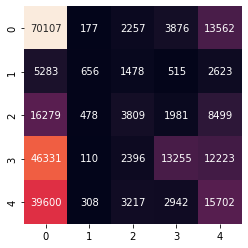

In [ ]:
mat_lr = confusion_matrix(y_pred,y_test)
sns.heatmap(mat_lr, square=True, annot=True, fmt='d', cbar=False,xticklabels=[0,1,2,3,4],yticklabels=[0,1,2,3,4])
plt.show()

# Random Forest

In [ ]:
RF= RandomForestClassifier(n_estimators=100,class_weight='balanced')
RF.fit(X_train, y_train)

## Predicting training data
y_pred = RF.predict(X_train)
acc_train_RF=accuracy_score(y_train, y_pred)
print("Accuracy of train data:",acc_train_RF)

## Predicting test data
y_pred = RF.predict(X_test)
acc_test_RF=accuracy_score(y_pred,y_test)
print("Accuracy of test data:",acc_test_RF)


Accuracy of train data: 0.9825345410353424
Accuracy of test data: 0.6626031143523223


In [ ]:
## Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.94      0.80    177600
           1       0.73      0.16      0.26      1729
           2       0.33      0.12      0.17     13157
           3       0.22      0.05      0.08     22569
           4       0.38      0.13      0.19     52609

    accuracy                           0.66    267664
   macro avg       0.47      0.28      0.30    267664
weighted avg       0.58      0.66      0.59    267664



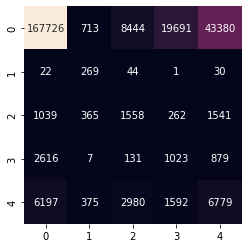

In [ ]:
mat_RF = confusion_matrix(y_pred,y_test)
sns.heatmap(mat_RF, square=True, annot=True, fmt='d', cbar=False,xticklabels=[0,1,2,3,4],yticklabels=[0,1,2,3,4])
plt.show()

# Table with all the accuracies

In [ ]:
frame=pd.DataFrame({"Train accuracy":[acc_train_lr,acc_train_dt,acc_train_RF],
                    "Test accuracy":[acc_test_lr,acc_test_dt,acc_test_RF]},
                   index=["Logistic Regression","Decision Tree","Random Forest"])
display(frame)

,Train accuracy,Test accuracy
Logistic Regression,0.664948,0.663597
Decision Tree,0.462662,0.386787
Random Forest,0.982535,0.662603


# Analysis

It seems without the PERSONS_INJURED column the accuracy is extremely poor which makes sense. After all, in the correlation matrix PERSONS_INJURED was the column that had the most relation to CRASH_SEVERITY.

Let's try modeling with the PERSONS_INJURED column

## B)Modeling using all columns INCLUDING PERSONS_INJURED (should get higher accuracies)


In [ ]:


#Remove the same columns, but keep the persons_injured column
x_clmns=list(df.columns)
x_clmns.remove("CRASH_SEVERITY_NEW")
x_clmns.remove("CRASH_DT")
x_clmns.remove("TIME")
x_clmns.remove("DATE")


#same target variable we are looking for
y_clmns=["CRASH_SEVERITY_NEW"]

X=df[x_clmns].values
y=df[y_clmns].values

y=np.reshape(y,(-1,1))
y=y[:,]

# Split the data set into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X,y[:,0], train_size=0.7, random_state=21)

print("Train size:",X_train.shape)
print("Test size:",X_test.shape)

severity_types={}
severity_types[1]=y_test[y_test==0].shape[0]
severity_types[2]=y_test[y_test==1].shape[0]
severity_types[3]=y_test[y_test==2].shape[0]
severity_types[4]=y_test[y_test==3].shape[0]
severity_types[5]=y_test[y_test==4].shape[0]

frame=pd.DataFrame(severity_types,index=["Different types of severity in test_data"])
display(frame)

Train size: (624547, 34)
Test size: (267664, 34)


,1,2,3,4,5
Different types of severity in test_data,177600,1729,13157,22569,52609


# Logistic Regression

In [ ]:
lr = LogisticRegression(random_state=0,solver='saga',max_iter=100)
lr.fit(X_train,y_train)

## Predicting training data
y_pred=lr.predict(X_train)
acc_train_lr=accuracy_score(y_train, y_pred)
print("Accuracy of train data:",acc_train_lr)

## Predicting test data
y_pred=lr.predict(X_test)
acc_test_lr=accuracy_score(y_test, y_pred)
print("Accuracy of test data:",acc_test_lr)

Accuracy of train data: 0.8609584226647474
Accuracy of test data: 0.860085779185845


In [ ]:
## Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    177600
           1       0.00      0.00      0.00      1729
           2       0.33      0.00      0.00     13157
           3       0.54      0.00      0.01     22569
           4       0.59      1.00      0.74     52609

    accuracy                           0.86    267664
   macro avg       0.49      0.40      0.35    267664
weighted avg       0.84      0.86      0.81    267664



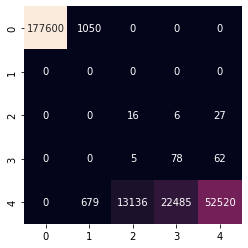

In [ ]:
## Confusion Matrix
mat_RF = confusion_matrix(y_pred,y_test)
sns.heatmap(mat_RF, square=True, annot=True, fmt='d', cbar=False,xticklabels=[0,1,2,3,4],yticklabels=[0,1,2,3,4])
plt.show()

# Decision Tree

In [ ]:
tree = DecisionTreeClassifier(max_depth=20,class_weight='balanced')
tree.fit(X_train, y_train)

## Predicting training data
y_pred = tree.predict(X_train)
acc_train_dt=accuracy_score(y_train, y_pred)
print("Accuracy of train data:",acc_train_dt)

## Predicting test data
y_pred = tree.predict(X_test)
acc_test_dt=accuracy_score(y_pred,y_test)
print("Accuracy of test data:",acc_test_dt)

Accuracy of train data: 0.864700334802665
Accuracy of test data: 0.8130790842249985


In [ ]:
## Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    177600
           1       0.09      0.44      0.15      1729
           2       0.27      0.41      0.33     13157
           3       0.46      0.65      0.54     22569
           4       0.72      0.48      0.58     52609

    accuracy                           0.81    267664
   macro avg       0.51      0.59      0.52    267664
weighted avg       0.86      0.81      0.83    267664



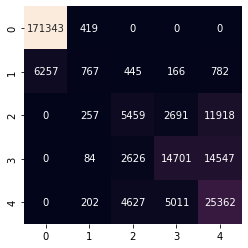

In [ ]:
## Confusion Matrix
mat_lr = confusion_matrix(y_pred,y_test)
sns.heatmap(mat_lr, square=True, annot=True, fmt='d', cbar=False,xticklabels=[0,1,2,3,4],yticklabels=[0,1,2,3,4])
plt.show()

# Random Forest Tree

In [ ]:
## Random Forest
RF= RandomForestClassifier(n_estimators=100,class_weight='balanced')
RF.fit(X_train, y_train)

## Predicting training data
y_pred = RF.predict(X_train)
acc_train_RF=accuracy_score(y_train, y_pred)
print("Accuracy of train data:",acc_train_RF)

## Predicting test data
y_pred = RF.predict(X_test)
acc_test_RF=accuracy_score(y_pred,y_test)
print("Accuracy of test data:",acc_test_RF)

Accuracy of train data: 0.9990745292187778
Accuracy of test data: 0.8738903999043577


In [ ]:
## Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    177600
           1       0.91      0.16      0.27      1729
           2       0.45      0.13      0.20     13157
           3       0.58      0.40      0.47     22569
           4       0.65      0.86      0.74     52609

    accuracy                           0.87    267664
   macro avg       0.72      0.51      0.54    267664
weighted avg       0.87      0.87      0.86    267664



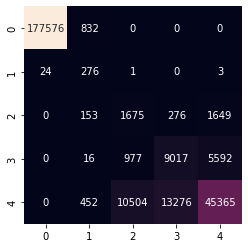

In [ ]:
## Confusion Matrix
mat_RF = confusion_matrix(y_pred,y_test)
sns.heatmap(mat_RF, square=True, annot=True, fmt='d', cbar=False,xticklabels=[0,1,2,3,4],yticklabels=[0,1,2,3,4])
plt.show()

# Table with all the accuracies

In [ ]:
frame=pd.DataFrame({"Train accuracy":[acc_train_lr,acc_train_dt,acc_train_RF],
                    "Test accuracy":[acc_test_lr,acc_test_dt,acc_test_RF]},
                   index=["Logistic Regression","Decision Tree","Random Forest"])
display(frame)

,Train accuracy,Test accuracy
Logistic Regression,0.860958,0.860086
Decision Tree,0.864700,0.813079
Random Forest,0.999075,0.873890


# Analysis
Accuracy is instantly better once PEDESTRIANS_INJURED is added. This section shows that PERSONS_INJURED does have a correlation to CRASH_SEVERITY due to the rapid increase in scores. But these accuracies might be able to increase even higher if we try some hyperparamter tuning.

## C) Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

In [ ]:
#simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

## Logistic regression hypertuning

In [ ]:
lr = LogisticRegression(random_state=0)
param_grid = {'max_iter' : [100,200,300],
              'penalty' : ['l2'],
              'C' : [100, 10, 1.0, 0.1, 0.01],
              'solver' : ['saga','sag']}

#using 100000 samples to reduce training time
clf_lr = RandomizedSearchCV(lr, param_distributions = param_grid, cv = 3, verbose = True, n_jobs = 1, random_state=0)
best_clf_lr = clf_lr.fit(X_train[:100000],y_train[:100000])
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Logistic Regression
Best Score: 0.8610900010722072
Best Parameters: {'solver': 'sag', 'penalty': 'l2', 'max_iter': 300, 'C': 10}


In [ ]:
#train using full dataset and best parameters
best_params = best_clf_lr.best_params_
lr = LogisticRegression(solver = best_params['solver'],max_iter = best_params['max_iter'],C = best_params['C'],random_state=0)
lr.fit(X_train,y_train)

## Predicting training data
y_pred=lr.predict(X_train)
acc_train_lr=accuracy_score(y_train, y_pred)
print("Accuracy of train data:",acc_train_lr)

## Predicting test data
y_pred=lr.predict(X_test)
acc_test_lr=accuracy_score(y_test, y_pred)
print("Accuracy of test data:",acc_test_lr)

Accuracy of train data: 0.8622713742920869
Accuracy of test data: 0.8612290035268098


In [ ]:
## Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    177600
           1       0.00      0.00      0.00      1729
           2       0.49      0.05      0.09     13157
           3       0.53      0.05      0.09     22569
           4       0.60      0.97      0.74     52609

    accuracy                           0.86    267664
   macro avg       0.52      0.41      0.38    267664
weighted avg       0.85      0.86      0.82    267664



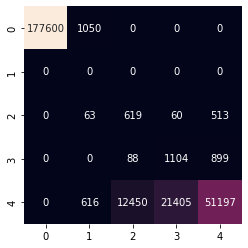

In [ ]:
## Confusion Matrix
mat_LR = confusion_matrix(y_pred,y_test)
sns.heatmap(mat_LR, square=True, annot=True, fmt='d', cbar=False,xticklabels=[0,1,2,3,4],yticklabels=[0,1,2,3,4])
plt.show()

## Decision Tree hypertuning

In [ ]:
dr = DecisionTreeClassifier(random_state = 0)
params = {
    'max_depth': [20, 40, 60 ,80, 100],
    'criterion': ["gini", "entropy"]
}

clf_dr = RandomizedSearchCV(dr, param_distributions = params, cv = 3, verbose = True, n_jobs = 1, random_state = 0)
best_clf_dr = clf_dr.fit(X_train,y_train)
clf_performance(best_clf_dr,'DecisionTree')

Fitting 3 folds for each of 10 candidates, totalling 30 fits
DecisionTree
Best Score: 0.8583325180890308
Best Parameters: {'max_depth': 20, 'criterion': 'gini'}


In [ ]:
#train using full dataset and best parameters
best_params = best_clf_dr.best_params_
dt = DecisionTreeClassifier(max_depth = best_params['max_depth'],criterion = best_params['criterion'],random_state=0)
dt.fit(X_train,y_train)

## Predicting training data
y_pred=dt.predict(X_train)
acc_train_dt=accuracy_score(y_train, y_pred)
print("Accuracy of train data:",acc_train_dt)

## Predicting test data
y_pred=dt.predict(X_test)
acc_test_dt=accuracy_score(y_test, y_pred)
print("Accuracy of test data:",acc_test_dt)

Accuracy of train data: 0.9212485209279686
Accuracy of test data: 0.8618267678880985


In [ ]:
## Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    177600
           1       0.30      0.24      0.27      1729
           2       0.33      0.21      0.25     13157
           3       0.52      0.46      0.49     22569
           4       0.67      0.77      0.71     52609

    accuracy                           0.86    267664
   macro avg       0.56      0.53      0.54    267664
weighted avg       0.85      0.86      0.86    267664



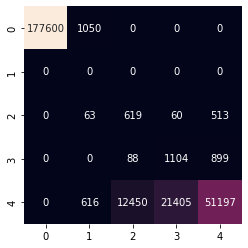

In [ ]:
## Confusion Matrix
mat_DT = confusion_matrix(y_pred,y_test)
sns.heatmap(mat_LR, square=True, annot=True, fmt='d', cbar=False,xticklabels=[0,1,2,3,4],yticklabels=[0,1,2,3,4])
plt.show()

## RandomForest hypertuning

In [ ]:
rf = RandomForestClassifier(random_state = 0)
param_grid =  {'n_estimators': [400,450,500,550],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [15, 20, 25],
                                  'max_features': ['auto','sqrt', 10],
                                  'min_samples_leaf': [2,3],
                                  'min_samples_split': [2,3]}
                                  
clf_rf = RandomizedSearchCV(rf, param_distributions = param_grid, cv = 3, verbose = True, n_jobs = -1, random_state=0)
best_clf_rf = clf_rf.fit(X_train[:100000],y_train[:100000])
clf_performance(best_clf_rf,'Random Forest')

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Random Forest
Best Score: 0.8752400009750382
Best Parameters: {'n_estimators': 400, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 10, 'max_depth': 20, 'criterion': 'gini', 'bootstrap': True}


In [ ]:
#train using full dataset and best parameters
best_params = clf_rf.best_params_
rf = RandomForestClassifier(n_estimators = best_params['n_estimators'],criterion = best_params['criterion'],max_depth = best_params['max_depth'],max_features = best_params['max_features'],min_samples_leaf = best_params['min_samples_leaf'],min_samples_split = best_params['min_samples_split'],bootstrap = True, random_state=0)
rf.fit(X_train,y_train)

## Predicting training data
y_pred=rf.predict(X_train)
acc_train_RF=accuracy_score(y_train, y_pred)
print("Accuracy of train data:",acc_train_RF)

## Predicting test data
y_pred=rf.predict(X_test)
acc_test_RF=accuracy_score(y_test, y_pred)
print("Accuracy of test data:",acc_test_RF)

Accuracy of train data: 0.9109098274429306
Accuracy of test data: 0.8792403909378923


In [ ]:
## Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    177600
           1       0.88      0.18      0.30      1729
           2       0.50      0.14      0.22     13157
           3       0.60      0.44      0.51     22569
           4       0.66      0.87      0.75     52609

    accuracy                           0.88    267664
   macro avg       0.73      0.53      0.55    267664
weighted avg       0.87      0.88      0.87    267664



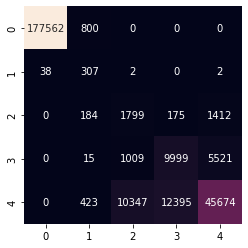

In [ ]:
## Confusion Matrix
mat_RF = confusion_matrix(y_pred,y_test)
sns.heatmap(mat_RF, square=True, annot=True, fmt='d', cbar=False,xticklabels=[0,1,2,3,4],yticklabels=[0,1,2,3,4])
plt.show()

# Comparison between non-hyperparameter tuned and hyperparameter tuned

Non-hyperparameter tuned

In [ ]:
display(frame)

,Train accuracy,Test accuracy
Logistic Regression,0.860958,0.860086
Decision Tree,0.864700,0.813079
Random Forest,0.999075,0.873890


Hyperparameter tuned

In [ ]:
hyper_frame=pd.DataFrame({"Train accuracy":[acc_train_lr,acc_train_dt,acc_train_RF],
                    "Test accuracy":[acc_test_lr,acc_test_dt,acc_test_RF]},
                   index=["Logistic Regression","Decision Tree","Random Forest"])

display(hyper_frame)

,Train accuracy,Test accuracy
Logistic Regression,0.862271,0.861229
Decision Tree,0.921249,0.861827
Random Forest,0.910910,0.879240


From the results we can see that hyperparameter tuning only had a large effect on the Decision Tree boosting the accuracy from about 81% to 86% for the test data. The Logistic Regression and Random Forest accuracies didn't change much.

# Conclusion

In conclusion, using this Virginia Crash dataset we found that the PERSONS_INJURED column has a large correlation with the Crash Severity column. Looking at the Crash Severity definitions on the Virginia Roads website allows us to get the entire picture of our results. “Crash Severity is coded using the KABCO scale,… based on the most severe injury to any person involved in the crash” (Virginia Department of Transportation 2017). Thinking about it, the crashes with the most severe injuries are likely to have a higher number of people injured compared to other crashes. Like we mentioned earlier, Property Damage Only was the highest type of crash severity. When we look at a distribution of PERSONS_INJURED, 66.8% of the accidents had 0 people injured. Comparing the 66.8% of accidents that had 0 people injured and the 66.4% of accidents that were reported as Property Damage Only, proves the relationship between the two. When we started this project, we thought that the crash severity column from the dataset was made up of a multitude of columns. However, from the research we’ve done on the crash severity column shows us that the PERSONS_INJURED column has the most influence compared to the other columns. Although using the amount of people injured to predict the type of crash is impossible, we still got a great insight about the entire dataset. If we had more time, perhaps we could find a dataset that has the crash severity column based on more factors such as fatalities instead of just injuries. 